# Clusterización / Métricas de Agrupamiento (K-means y DBSCAN) (Core)

Métricas de Agrupamiento (K-means y DBSCAN) (Core)





## Descripción

En esta actividad, se utilizarán los algoritmos K-means y DBSCAN para agrupar datos del dataset “Credit Card Data” disponible en Kaggle. El objetivo es aplicar ambas técnicas de clustering y compararlas utilizando métricas como el “silhouette score” y el “calinski-harabasz index” para evaluar la calidad de los clusters obtenidos.

Enlace al dataset: https://www.kaggle.com/arjunbhasin2013/ccdata

## Objetivo

El objetivo es comparar la efectividad de K-means y DBSCAN en el dataset seleccionado, evaluando la cohesión e intersección de los clusters obtenidos mediante métricas de evaluación. Se espera que los estudiantes comprendan las diferencias entre ambos algoritmos y cómo usar las métricas adecuadas para elegir el mejor modelo de clustering.




# 1. Carga del Dataset:

  – Descarga y carga el dataset “Credit Card Data” de Kaggle. Realiza una exploración inicial de las variables y observa cómo se distribuyen.
  
  – Este dataset incluye información sobre los comportamientos de clientes de tarjetas de crédito. Variables como el monto total de gastos, el número de compras y el saldo de la cuenta son de interés para el agrupamiento.



CUST_ID : Identificación del titular de la tarjeta de crédito (Categórica)

**BALANCE : Importe del saldo que queda en su cuenta para realizar compras** (

BALANCE_FREQUENCY : Frecuencia con la que se actualiza el saldo, puntuación entre 0 y 1 (1 = se actualiza con frecuencia, 0 = no se actualiza con frecuencia)

**COMPRAS : Importe de las compras realizadas desde la cuenta**

ONEOFF_PURCHASES : Importe máximo de compras realizadas de una sola vez

COMPRAS_A PLAZOS : Importe de las compras realizadas a plazos

CASH_ADVANCE : Efectivo adelantado por el usuario

PURCHASES_FREQUENCY : Frecuencia con la que se realizan las compras, puntuación entre 0 y 1 (1 = compras frecuentes, 0 = compras poco frecuentes)

FRECUENCIA DE LAS COMPRAS DE UNA SOLA VEZ : frecuencia con la que se realizan las compras de una sola vez (1 = compras frecuentes, 0 = compras poco frecuentes)

FRECUENCIA DE COMPRAS A PLAZOS : Frecuencia con la que se realizan compras a plazos (1 = se realizan con frecuencia, 0 = no se realizan con frecuencia)

CASHADVANCEFREQUENCY : Frecuencia con la que se paga en efectivo por adelantado

CASHADVANCETRX : Número de transacciones realizadas con «Efectivo por adelantado»

**PURCHASES_TRX : Número de transacciones de compra realizadas**

CREDIT_LIMIT : Límite de la tarjeta de crédito del usuario

PAGOS : Importe de los pagos realizados por el usuario

MINIMUM_PAYMENTS : Importe mínimo de pagos realizados por el usuario

PRCFULLPAYMENT : Porcentaje del pago total abonado por el usuario

TENURE : Tenencia del servicio de tarjeta de crédito para el usuario

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/6_Core_CC GENERAL.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [2]:
# Verificando si hay datos nulos (%)
print("Valores nulos:")
print((df.isnull().sum() * 100 / len(df)).round(2))
print("\n")

# Verificando si hay duplicados
print("Valores duplicados:")
print(df.duplicated().sum())
print("\n")

Valores nulos:
CUST_ID                             0.00
BALANCE                             0.00
BALANCE_FREQUENCY                   0.00
PURCHASES                           0.00
ONEOFF_PURCHASES                    0.00
INSTALLMENTS_PURCHASES              0.00
CASH_ADVANCE                        0.00
PURCHASES_FREQUENCY                 0.00
ONEOFF_PURCHASES_FREQUENCY          0.00
PURCHASES_INSTALLMENTS_FREQUENCY    0.00
CASH_ADVANCE_FREQUENCY              0.00
CASH_ADVANCE_TRX                    0.00
PURCHASES_TRX                       0.00
CREDIT_LIMIT                        0.01
PAYMENTS                            0.00
MINIMUM_PAYMENTS                    3.50
PRC_FULL_PAYMENT                    0.00
TENURE                              0.00
dtype: float64


Valores duplicados:
0




In [3]:
df.describe().round()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.0,8950.0,8950.0,8950.0,8950.0,8950.0,8950.0,8950.0,8950.0,8950.0,8950.0,8950.0,8949.0,8950.0,8637.0,8950.0,8950.0
mean,1564.0,1.0,1003.0,592.0,411.0,979.0,0.0,0.0,0.0,0.0,3.0,15.0,4494.0,1733.0,864.0,0.0,12.0
std,2082.0,0.0,2137.0,1660.0,904.0,2097.0,0.0,0.0,0.0,0.0,7.0,25.0,3639.0,2895.0,2372.0,0.0,1.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50.0,0.0,0.0,0.0,6.0
25%,128.0,1.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1600.0,383.0,169.0,0.0,12.0
50%,873.0,1.0,361.0,38.0,89.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,3000.0,857.0,312.0,0.0,12.0
75%,2054.0,1.0,1110.0,577.0,469.0,1114.0,1.0,0.0,1.0,0.0,4.0,17.0,6500.0,1901.0,825.0,0.0,12.0
max,19043.0,1.0,49040.0,40761.0,22500.0,47137.0,1.0,1.0,1.0,2.0,123.0,358.0,30000.0,50721.0,76406.0,1.0,12.0


In [4]:
# Detectar outliers en variables numéricas
def outliers_IQR(df):
    # Filtrar solo columnas numéricas
    numeric_columns = df.select_dtypes(include=['number']).columns

    for col in numeric_columns:
        Q1 = df[col].quantile(0.25)  # Primer cuartil
        Q3 = df[col].quantile(0.75)  # Tercer cuartil
        IQR = Q3 - Q1               # Rango intercuartílico

        # Definir los límites inferior y superior de los valores atípicos
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Identificar outliers
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        print(f"\n🚩 Outliers detected in {col}: {outliers.shape[0]}")

        # Opcional: Remover outliers
        # df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

# Llamar a la función
outliers_IQR(df)


🚩 Outliers detected in BALANCE: 695

🚩 Outliers detected in BALANCE_FREQUENCY: 1493

🚩 Outliers detected in PURCHASES: 808

🚩 Outliers detected in ONEOFF_PURCHASES: 1013

🚩 Outliers detected in INSTALLMENTS_PURCHASES: 867

🚩 Outliers detected in CASH_ADVANCE: 1030

🚩 Outliers detected in PURCHASES_FREQUENCY: 0

🚩 Outliers detected in ONEOFF_PURCHASES_FREQUENCY: 782

🚩 Outliers detected in PURCHASES_INSTALLMENTS_FREQUENCY: 0

🚩 Outliers detected in CASH_ADVANCE_FREQUENCY: 525

🚩 Outliers detected in CASH_ADVANCE_TRX: 804

🚩 Outliers detected in PURCHASES_TRX: 766

🚩 Outliers detected in CREDIT_LIMIT: 248

🚩 Outliers detected in PAYMENTS: 808

🚩 Outliers detected in MINIMUM_PAYMENTS: 841

🚩 Outliers detected in PRC_FULL_PAYMENT: 1474

🚩 Outliers detected in TENURE: 1366


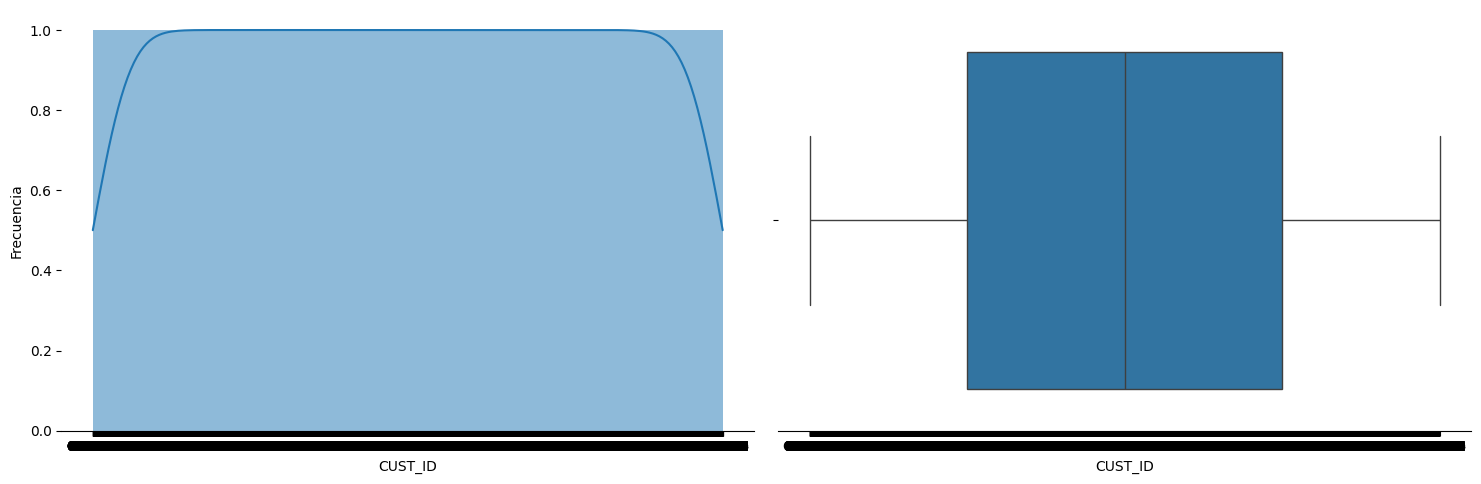

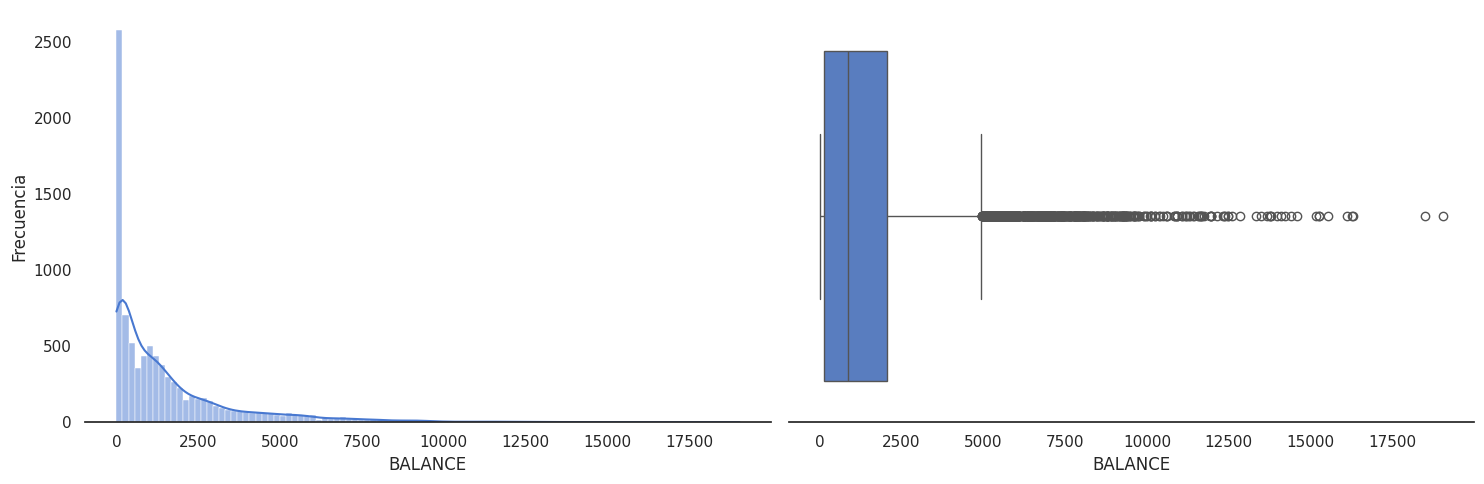

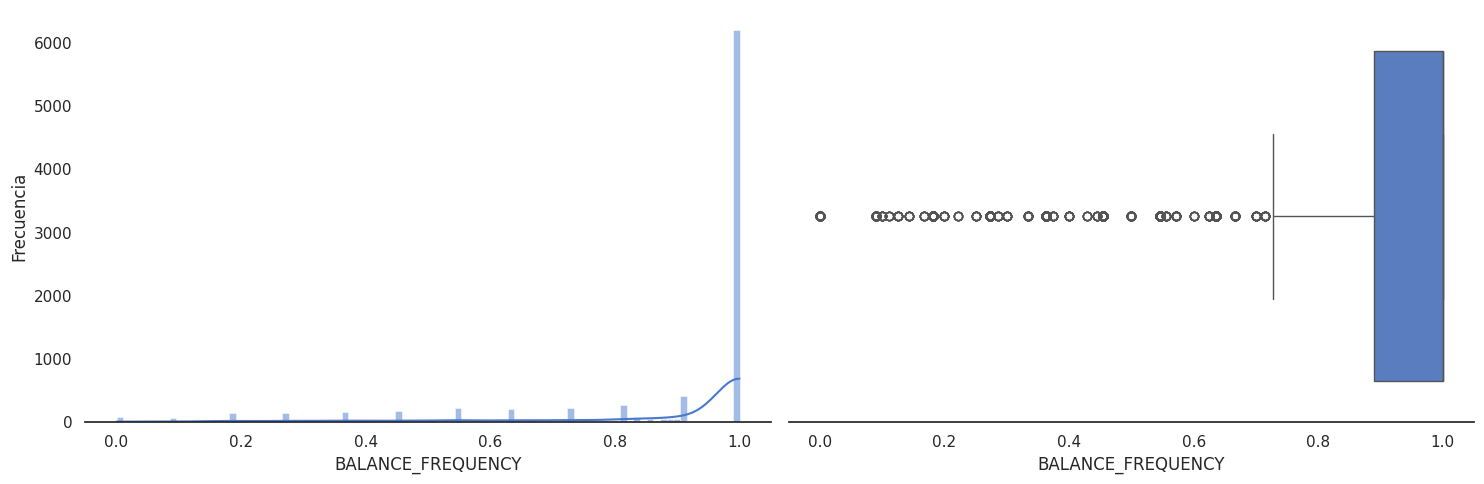

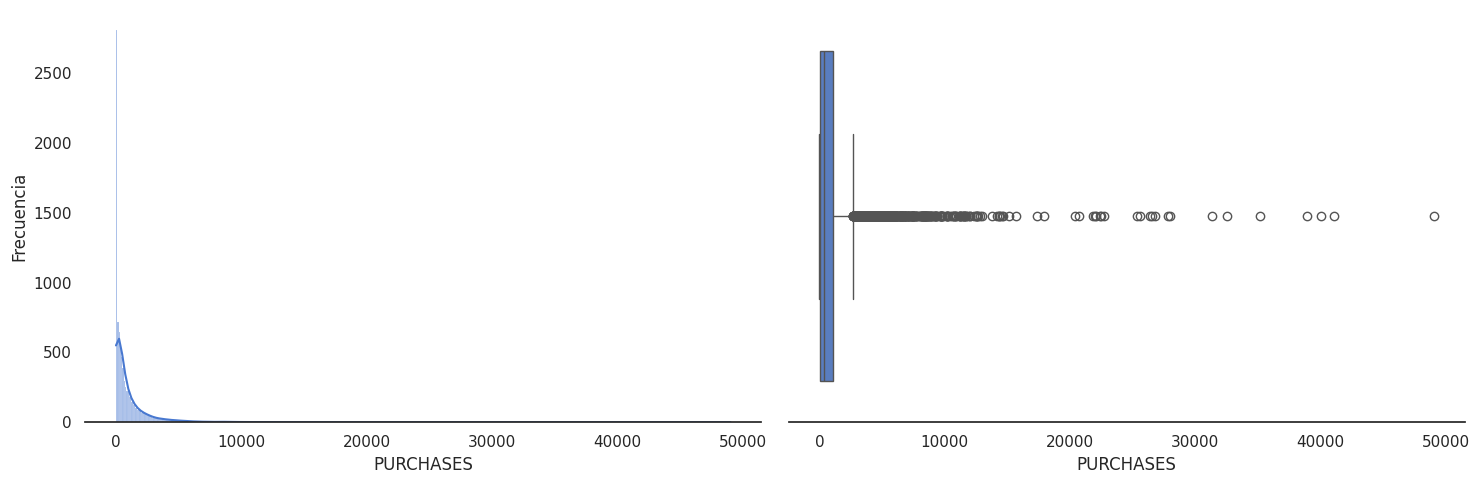

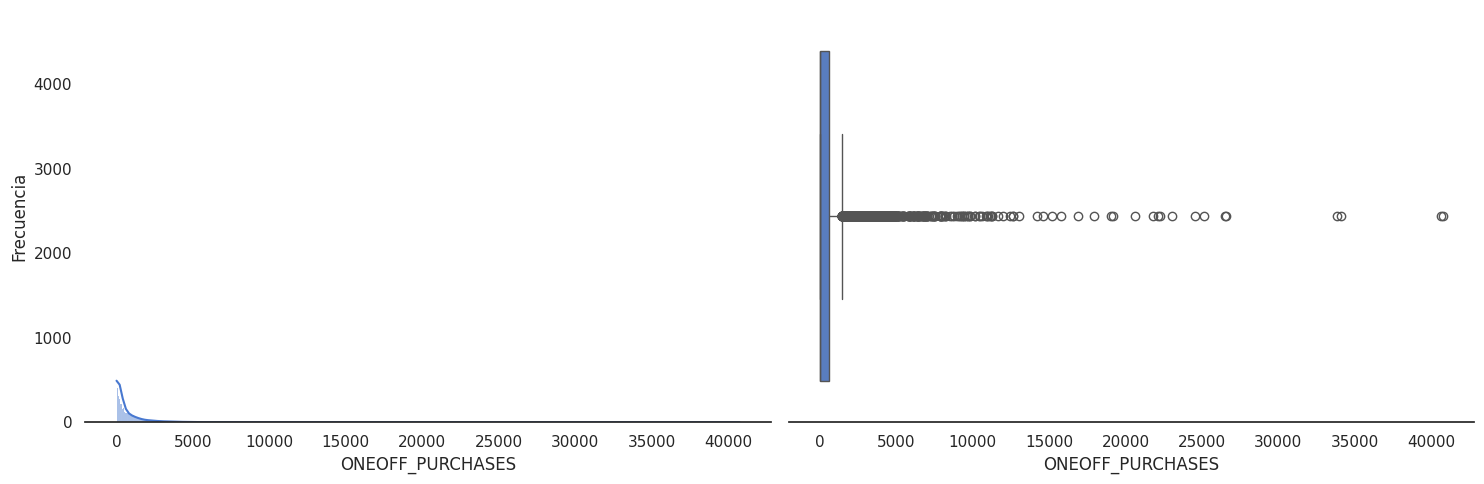

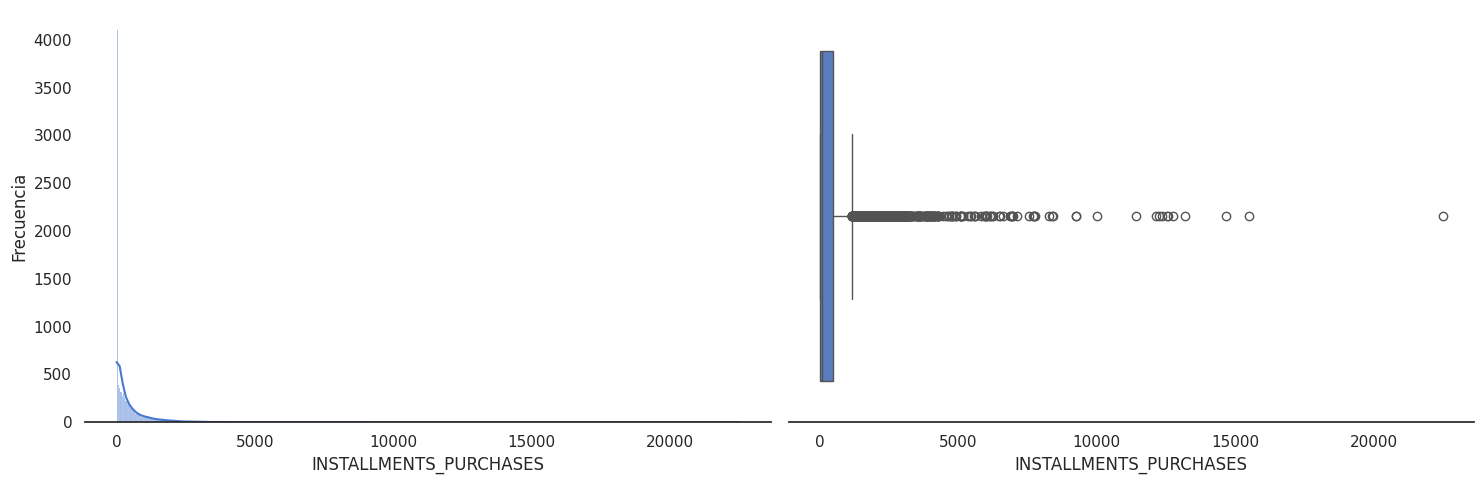

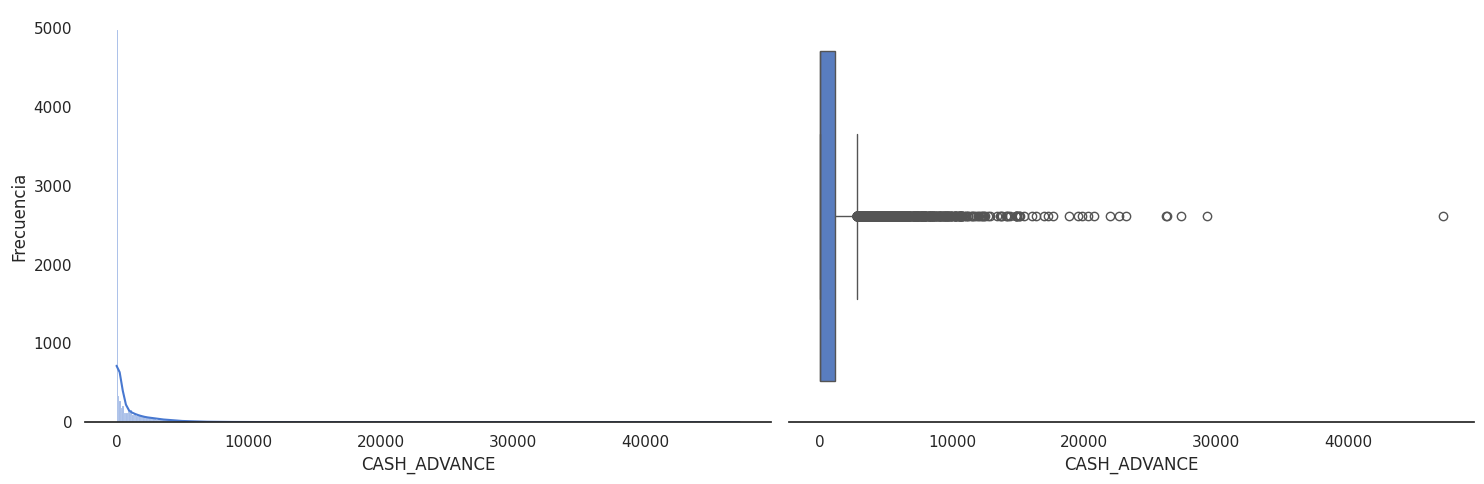

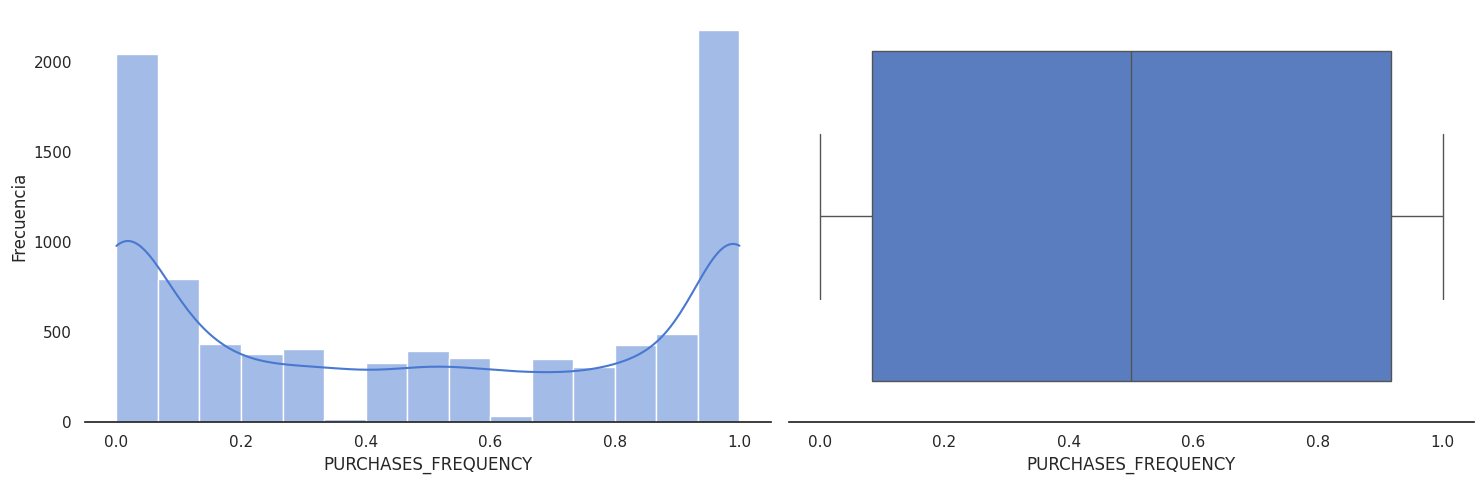

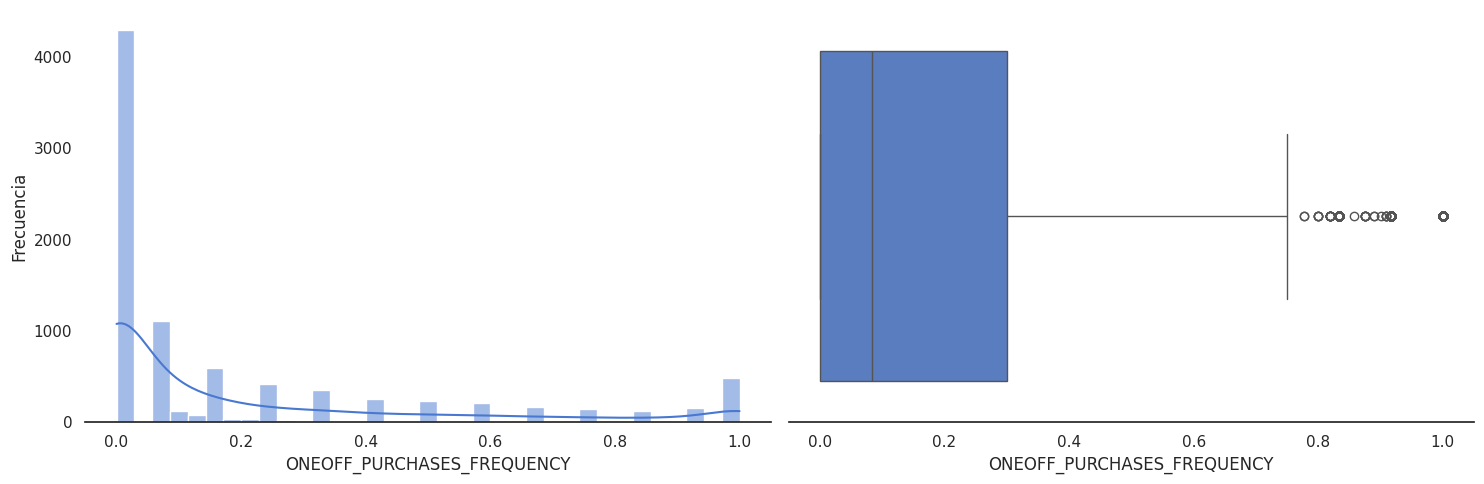

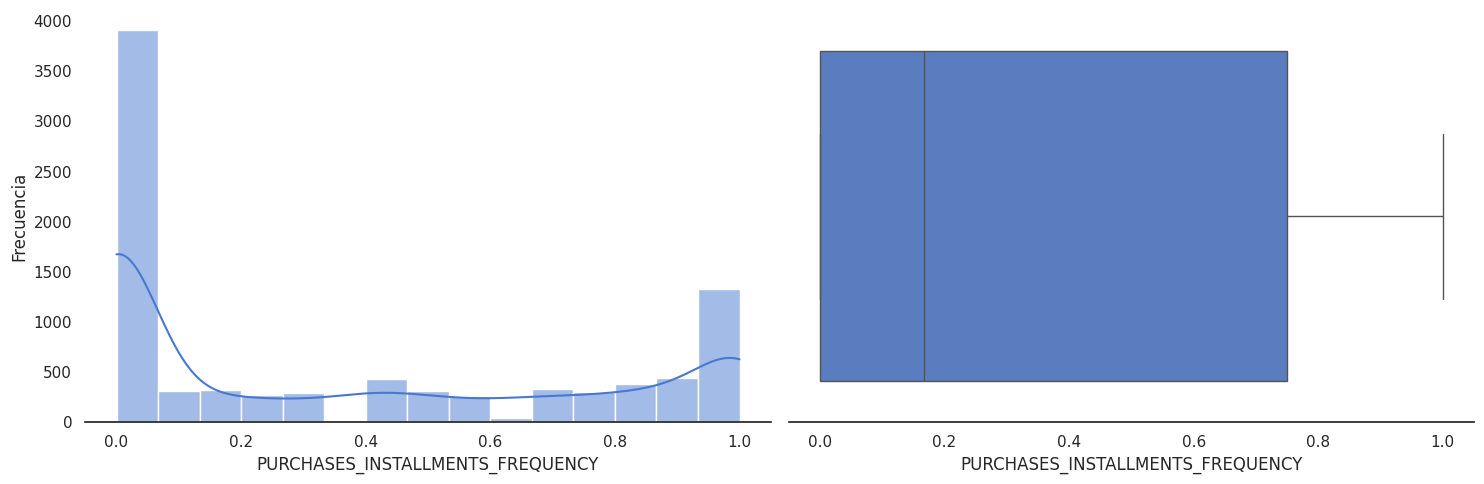

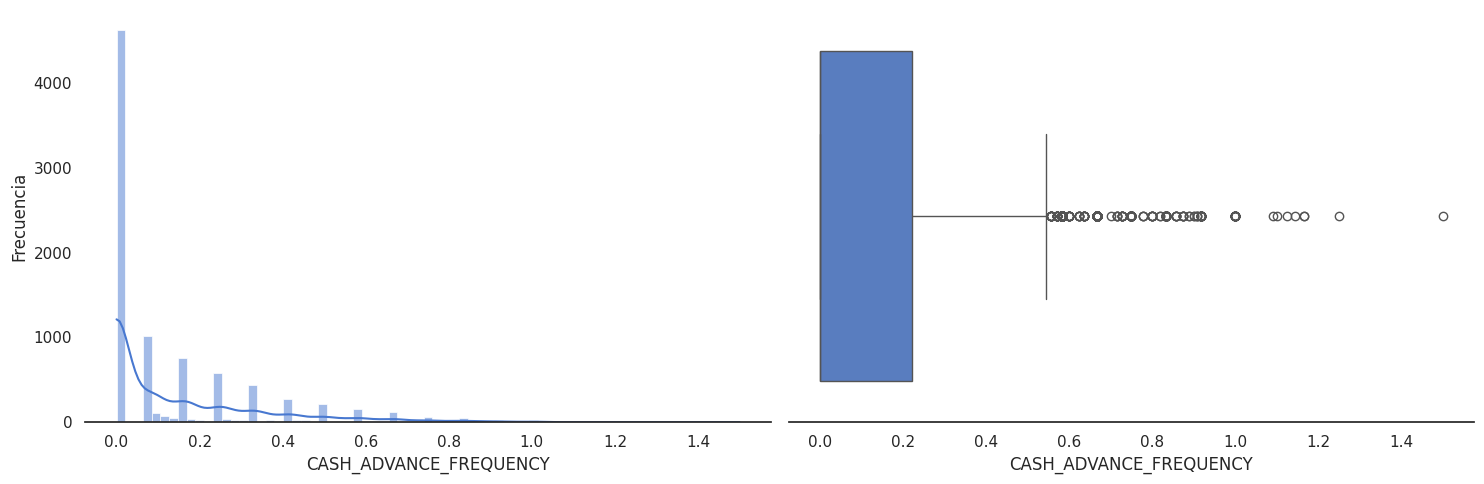

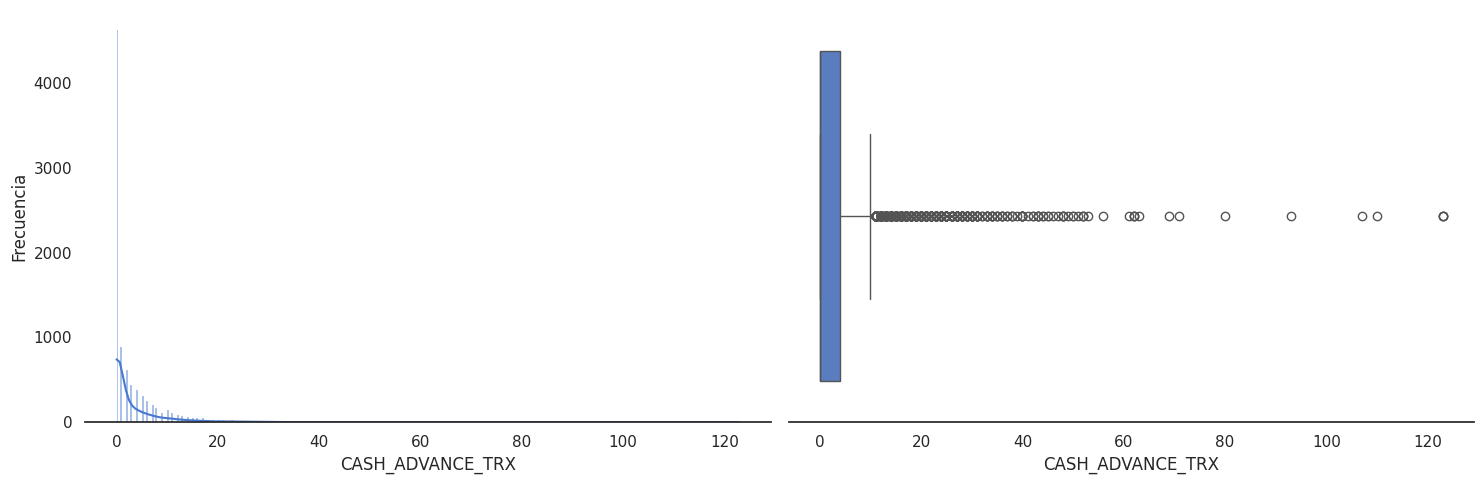

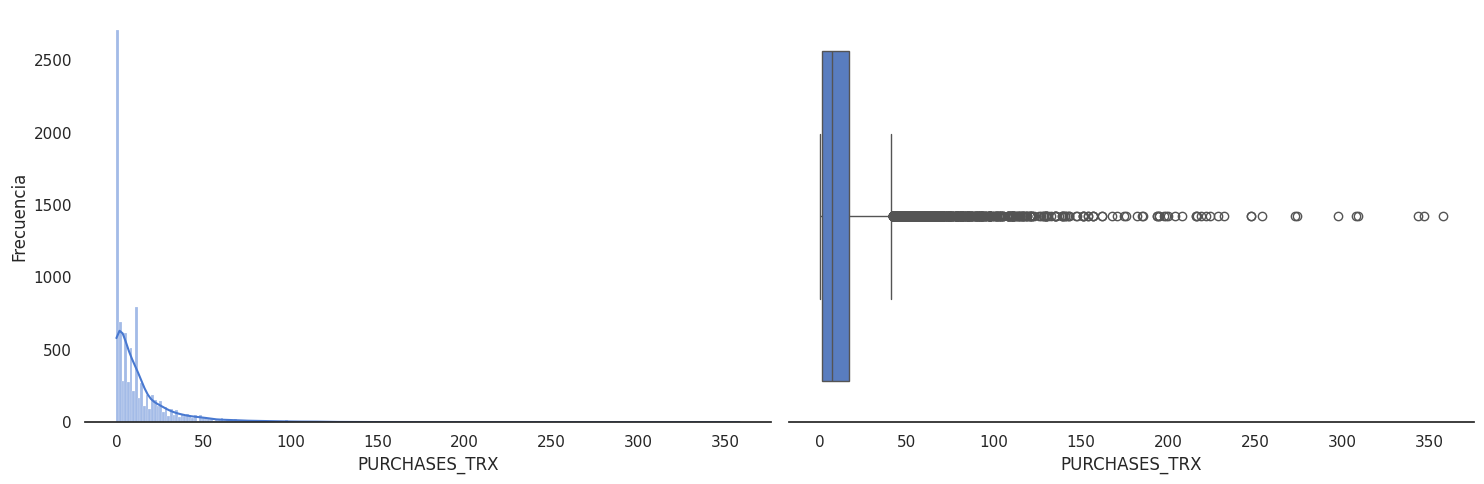

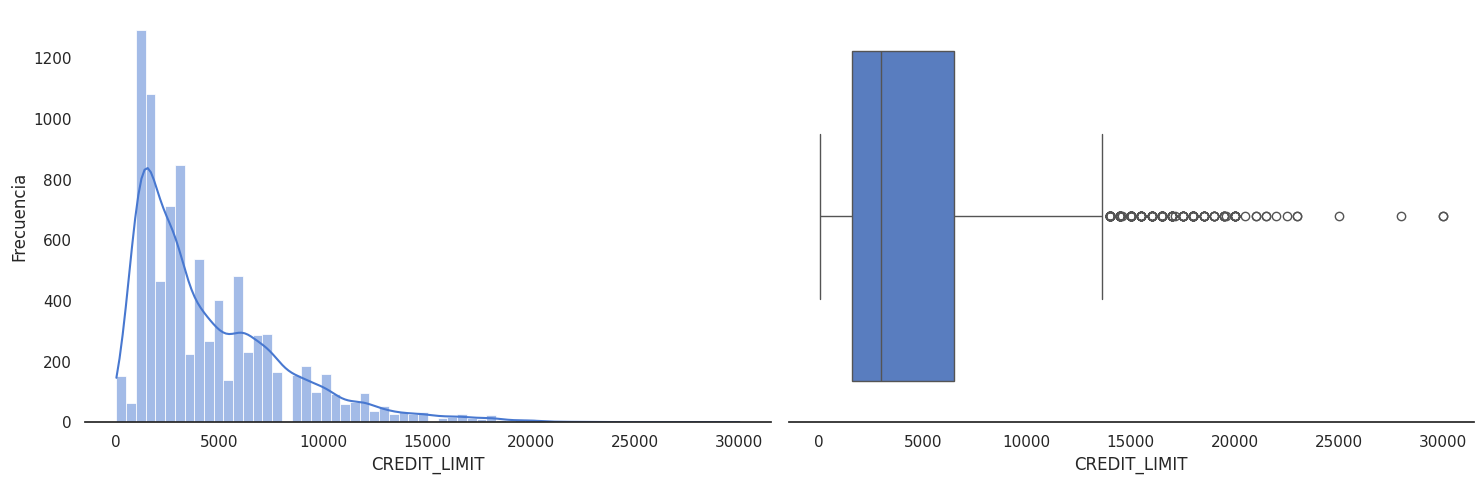

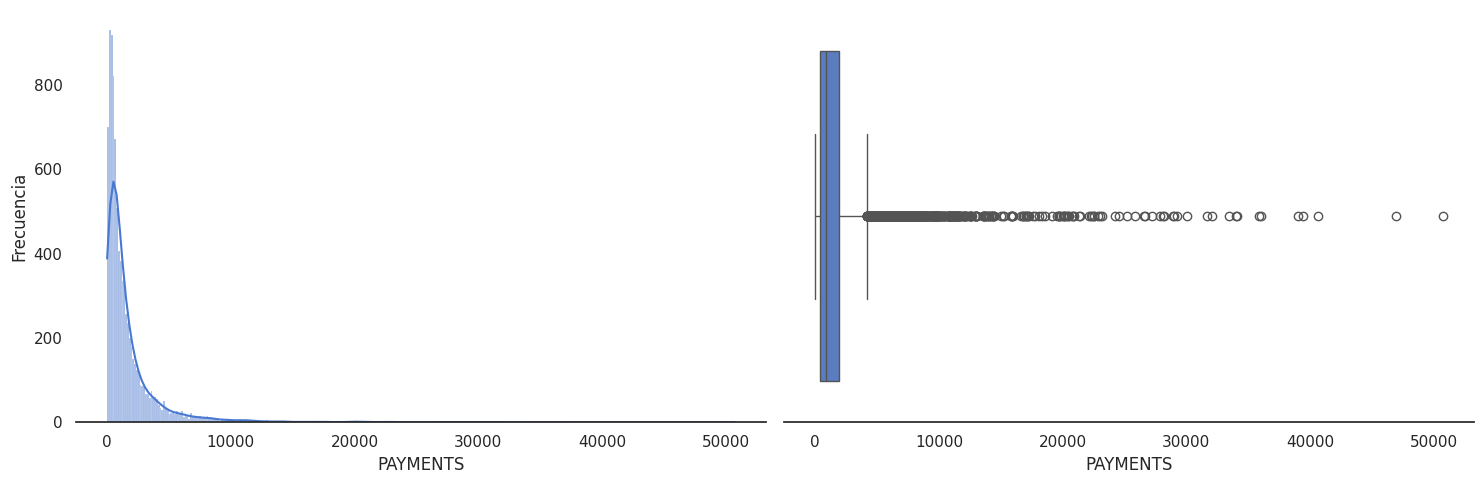

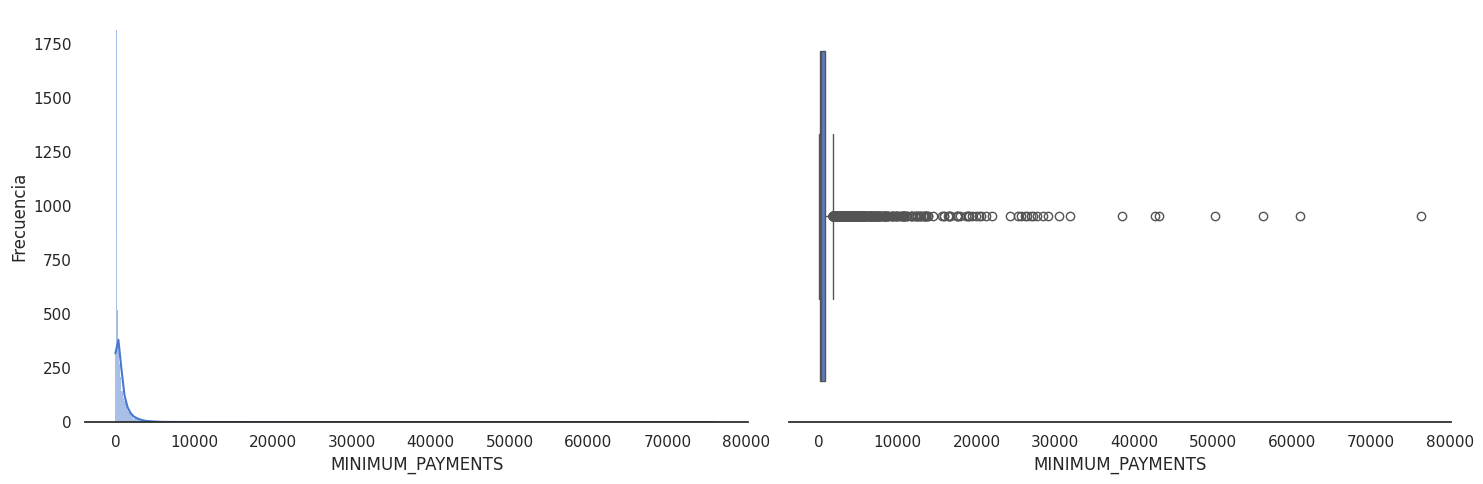

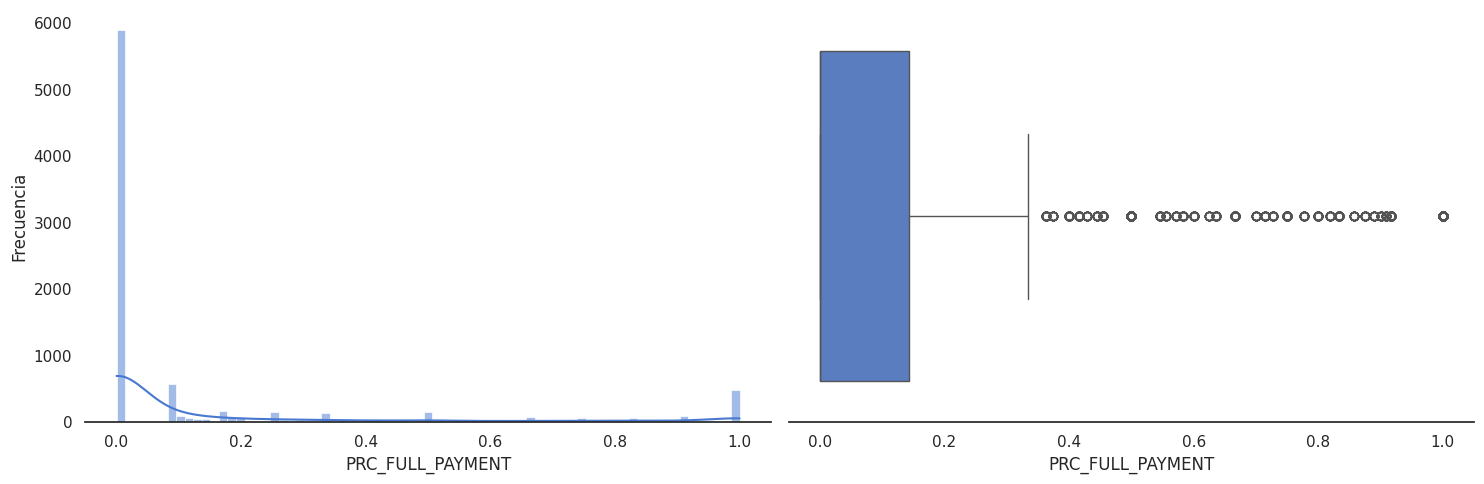

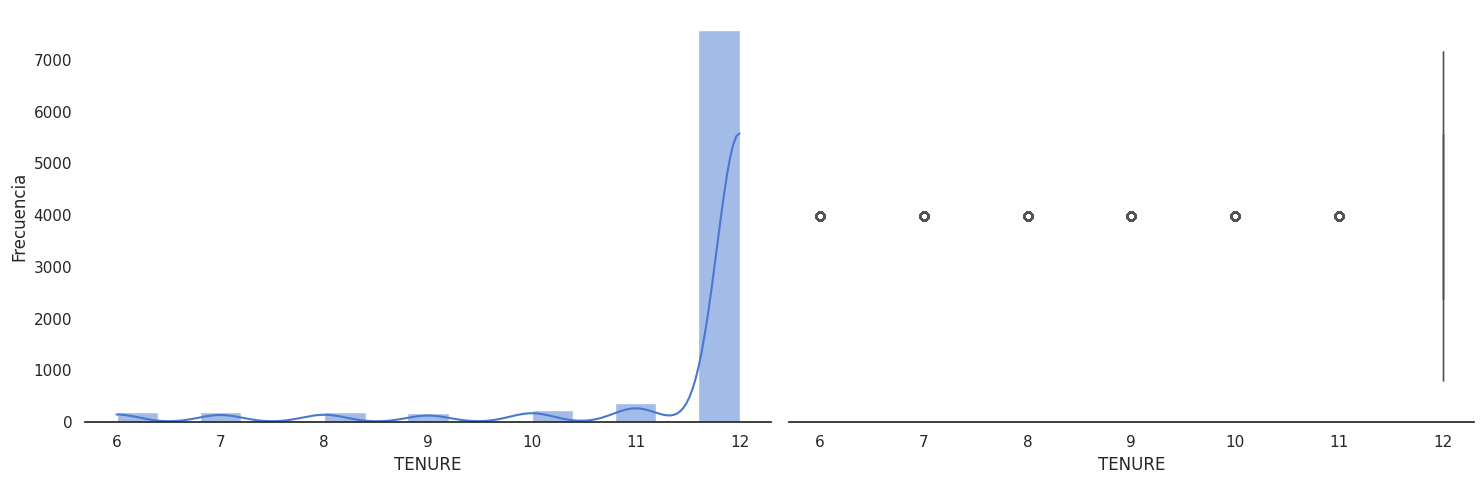

In [5]:
def vis_hist_boxplot(df):
    for i in df.columns:
        fig, ax = plt.subplots(figsize=(15, 5), nrows=1, ncols=2)
        sns.set(style="white", palette="muted", color_codes=True)
        sns.despine(left=True)

        # Histograma con kde
        sns.histplot(data=df, x=i, kde=True, ax=ax[0]).set_xlabel(f"{i}")
        ax[0].set_ylabel('Frecuencia')
        # Boxplot
        sns.boxplot(data=df, x=i, ax=ax[1])

        plt.tight_layout()
        plt.show()

vis_hist_boxplot(df)

## Análisis
Se realizó la carga de datos verificándose los nulos y las estadísticas descriptivas básicas, donde se pudo apreciar que por un lado había nulos, no había duplicados, pero si había datos extremos (outliers), y en cuanto a las visualizaciones, las distribuciones de la mayoría de las variables tienen sesgo hacía la derecha, algunos muy marcados, por lo que se debe hacer tratamiento de outliers para poder realizar de buena manera los algoritmos

# 2. Exploración y preprocesamiento de datos:

  – Realiza una limpieza inicial de los datos, eliminando valores atípicos y manejando cualquier valor nulo presente en el dataset.

  – Estandariza las variables para asegurar que el rango de las características no afecte el rendimiento de los algoritmos de clustering.
  
  – Selecciona las características más relevantes para el análisis, como los montos de compras y la frecuencia de uso de la tarjeta.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/6_Core_CC GENERAL.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [7]:
# Eliminar filas con valores nulos
df = df.dropna()

# Verificar si se eliminaron los valores nulos
print("Valores nulos después de la eliminación:")
print((df.isnull().sum() * 100 / len(df)).round(2))

Valores nulos después de la eliminación:
CUST_ID                             0.0
BALANCE                             0.0
BALANCE_FREQUENCY                   0.0
PURCHASES                           0.0
ONEOFF_PURCHASES                    0.0
INSTALLMENTS_PURCHASES              0.0
CASH_ADVANCE                        0.0
PURCHASES_FREQUENCY                 0.0
ONEOFF_PURCHASES_FREQUENCY          0.0
PURCHASES_INSTALLMENTS_FREQUENCY    0.0
CASH_ADVANCE_FREQUENCY              0.0
CASH_ADVANCE_TRX                    0.0
PURCHASES_TRX                       0.0
CREDIT_LIMIT                        0.0
PAYMENTS                            0.0
MINIMUM_PAYMENTS                    0.0
PRC_FULL_PAYMENT                    0.0
TENURE                              0.0
dtype: float64


In [8]:
from scipy import stats
from scipy.stats import boxcox

# Selecciona las columnas numéricas
numeric_cols = df.select_dtypes(include=['number']).columns

# Aplica la transformación Box-Cox a las columnas numéricas
for col in numeric_cols:
    # Ajusta la transformación Box-Cox a la columna
    transformed_data, lambda_val = stats.boxcox(df[col] + 1)  # Agrega 1 para manejar valores cero o negativos

    # Reemplaza la columna original con los datos transformados
    df[col] = transformed_data


In [9]:
outliers_IQR(df)


🚩 Outliers detected in BALANCE: 0

🚩 Outliers detected in BALANCE_FREQUENCY: 0

🚩 Outliers detected in PURCHASES: 21

🚩 Outliers detected in ONEOFF_PURCHASES: 0

🚩 Outliers detected in INSTALLMENTS_PURCHASES: 0

🚩 Outliers detected in CASH_ADVANCE: 0

🚩 Outliers detected in PURCHASES_FREQUENCY: 0

🚩 Outliers detected in ONEOFF_PURCHASES_FREQUENCY: 0

🚩 Outliers detected in PURCHASES_INSTALLMENTS_FREQUENCY: 0

🚩 Outliers detected in CASH_ADVANCE_FREQUENCY: 0

🚩 Outliers detected in CASH_ADVANCE_TRX: 0

🚩 Outliers detected in PURCHASES_TRX: 0

🚩 Outliers detected in CREDIT_LIMIT: 6

🚩 Outliers detected in PAYMENTS: 94

🚩 Outliers detected in MINIMUM_PAYMENTS: 141

🚩 Outliers detected in PRC_FULL_PAYMENT: 0

🚩 Outliers detected in TENURE: 1290


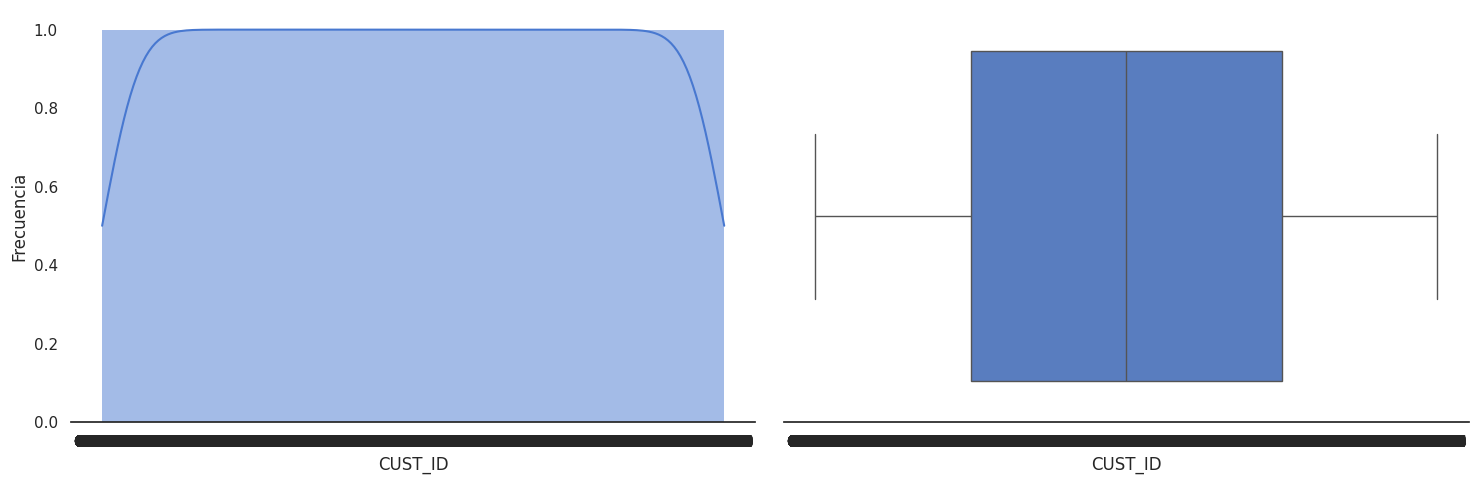

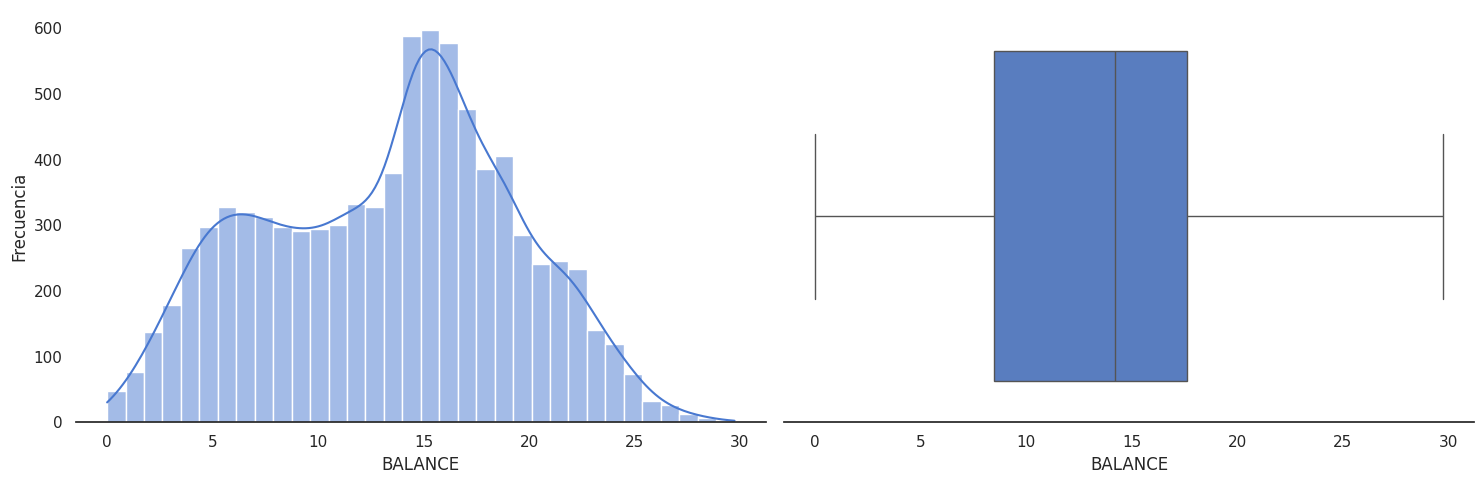

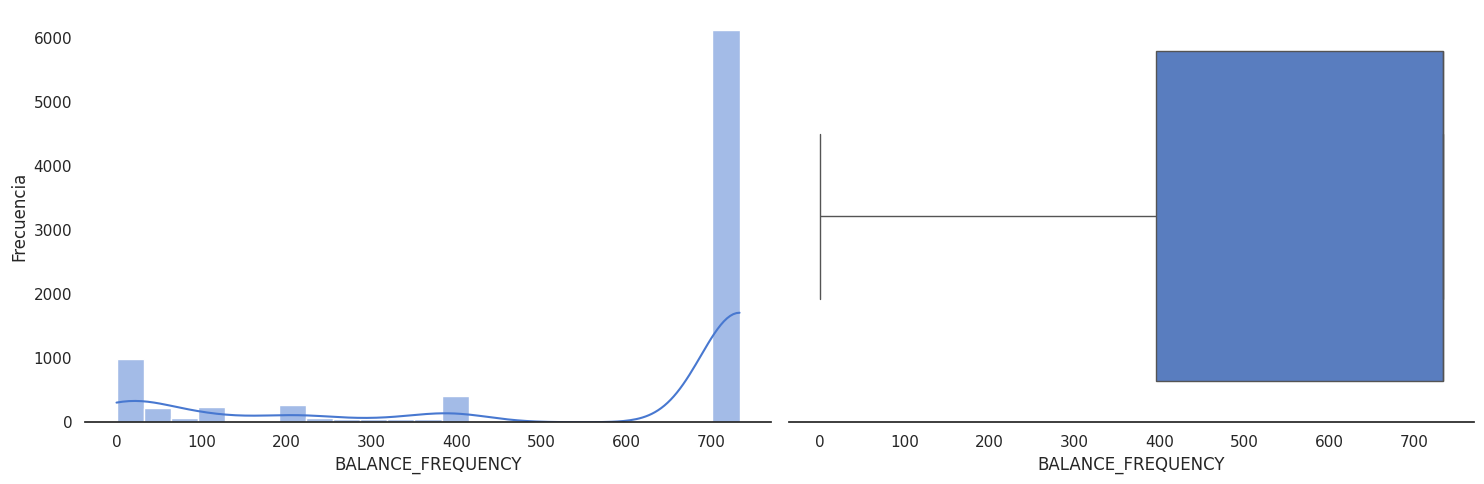

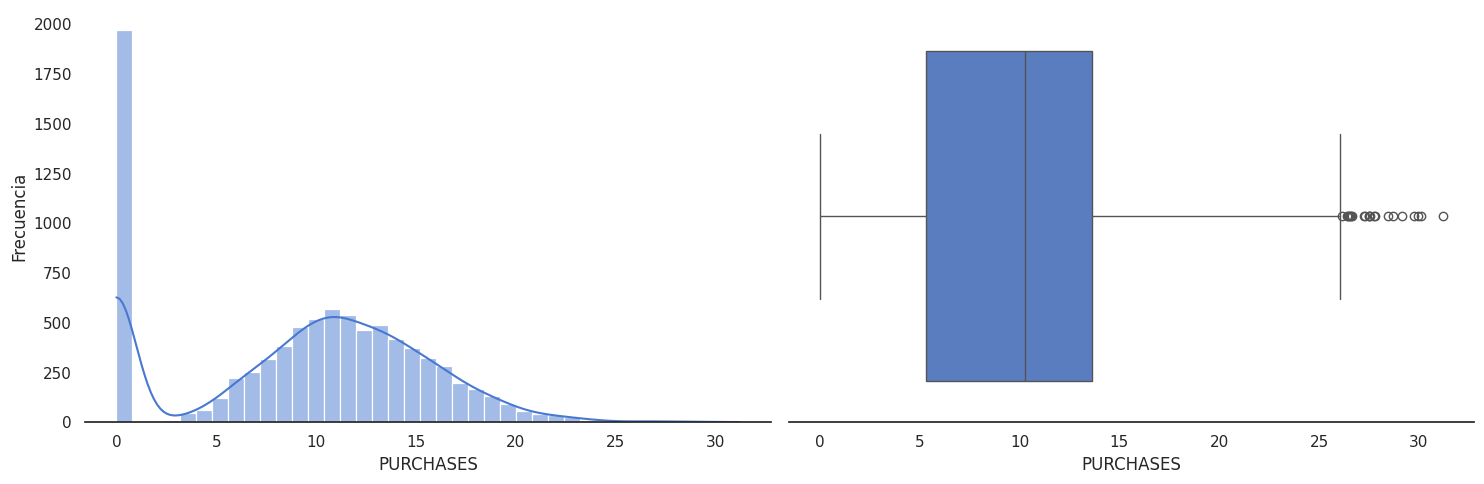

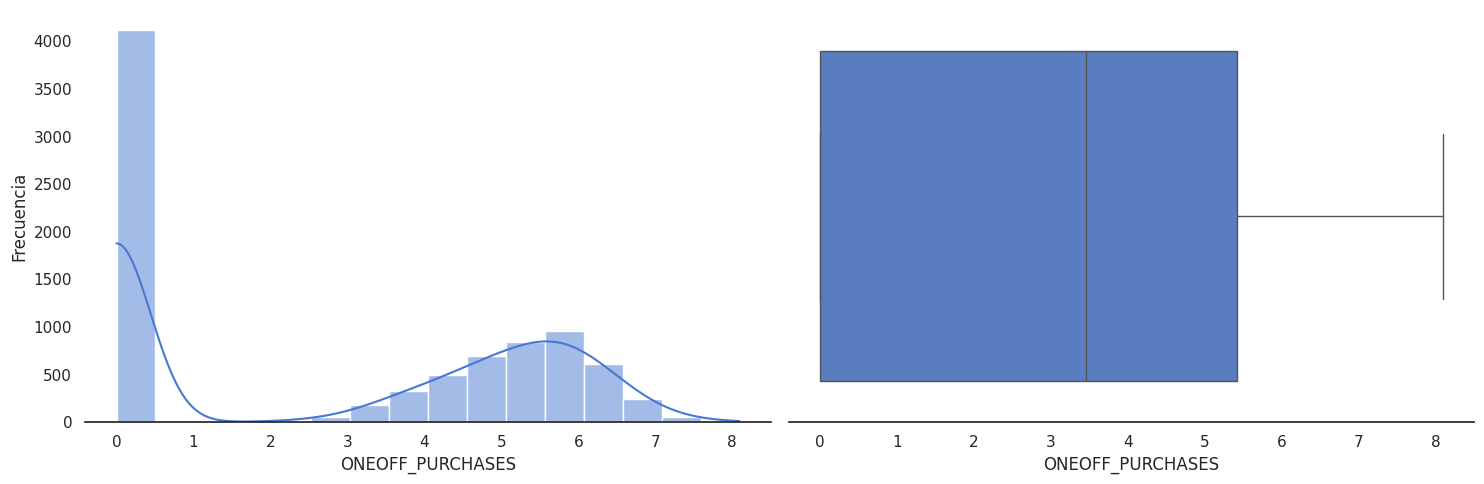

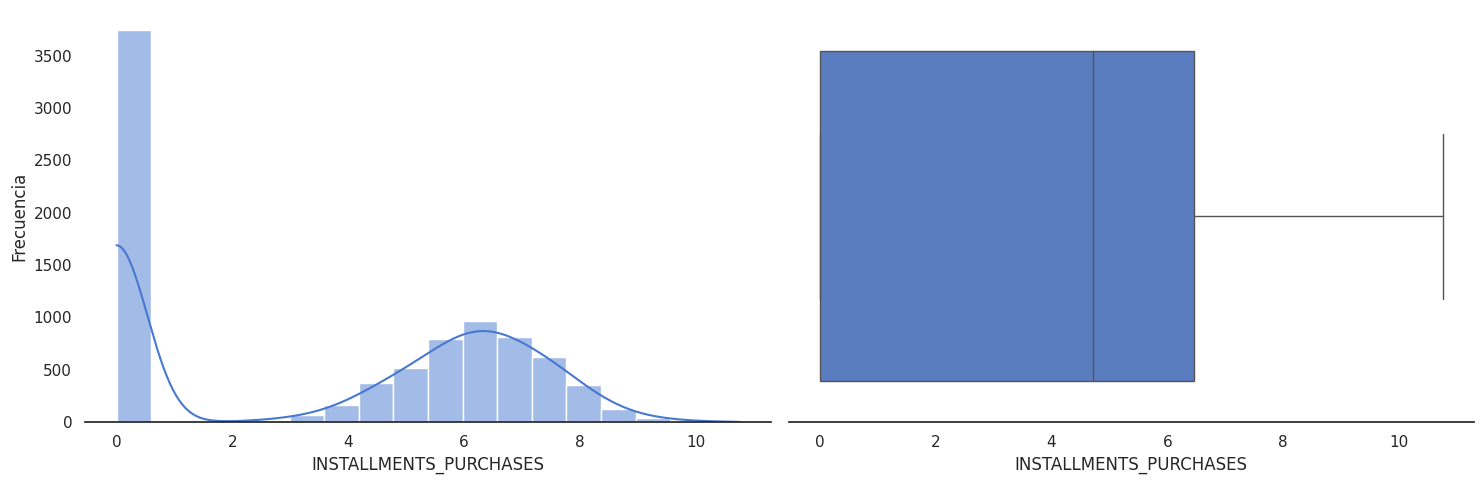

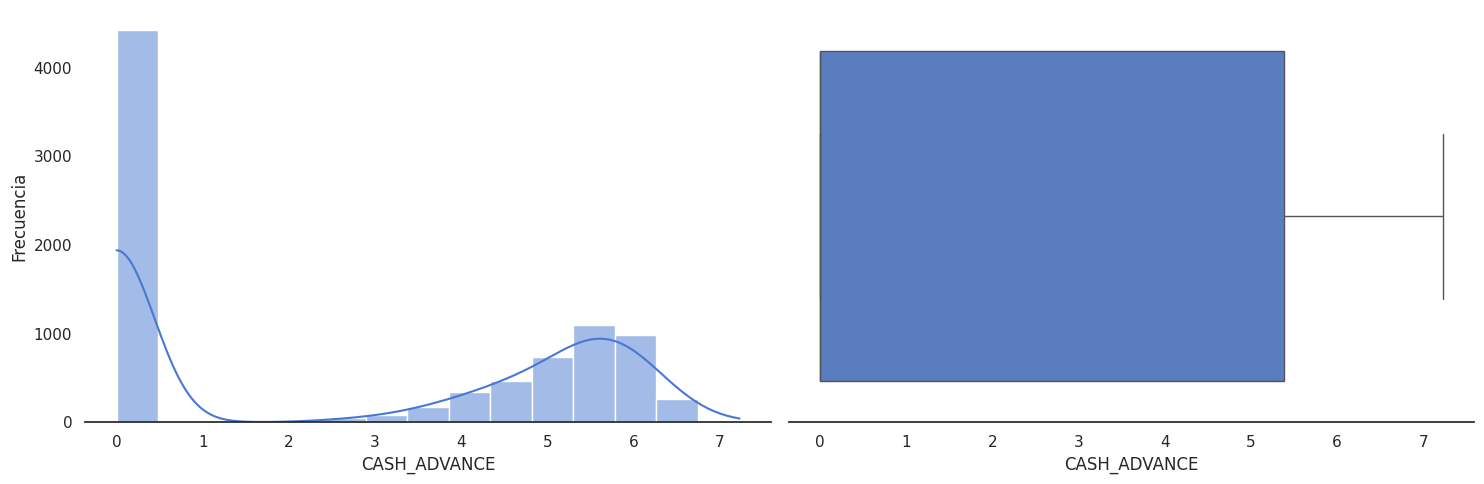

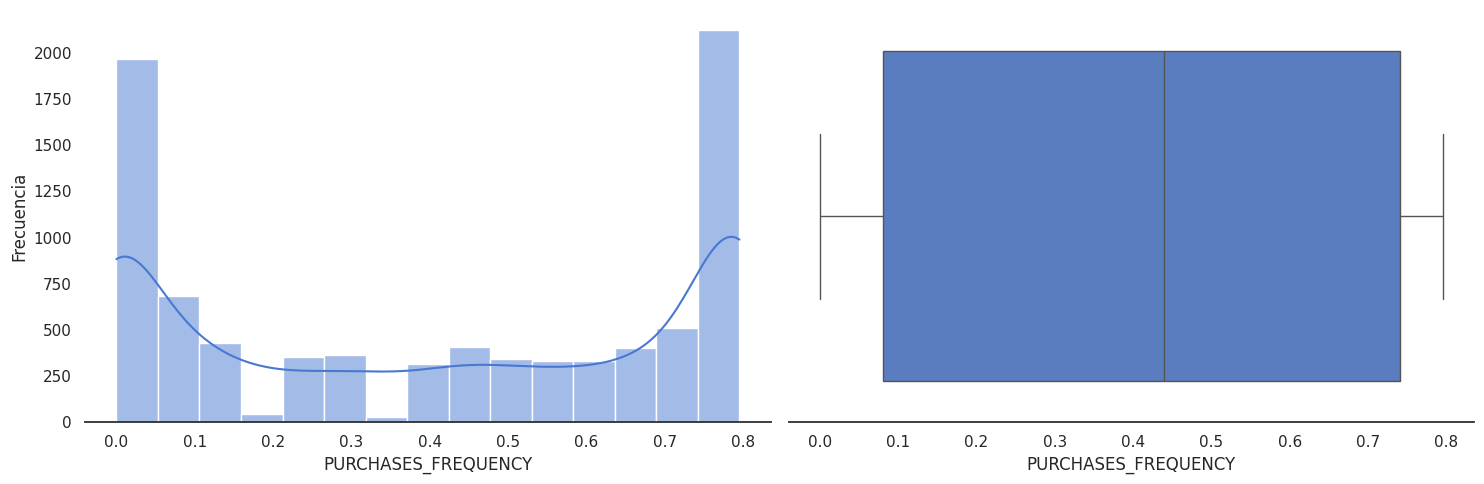

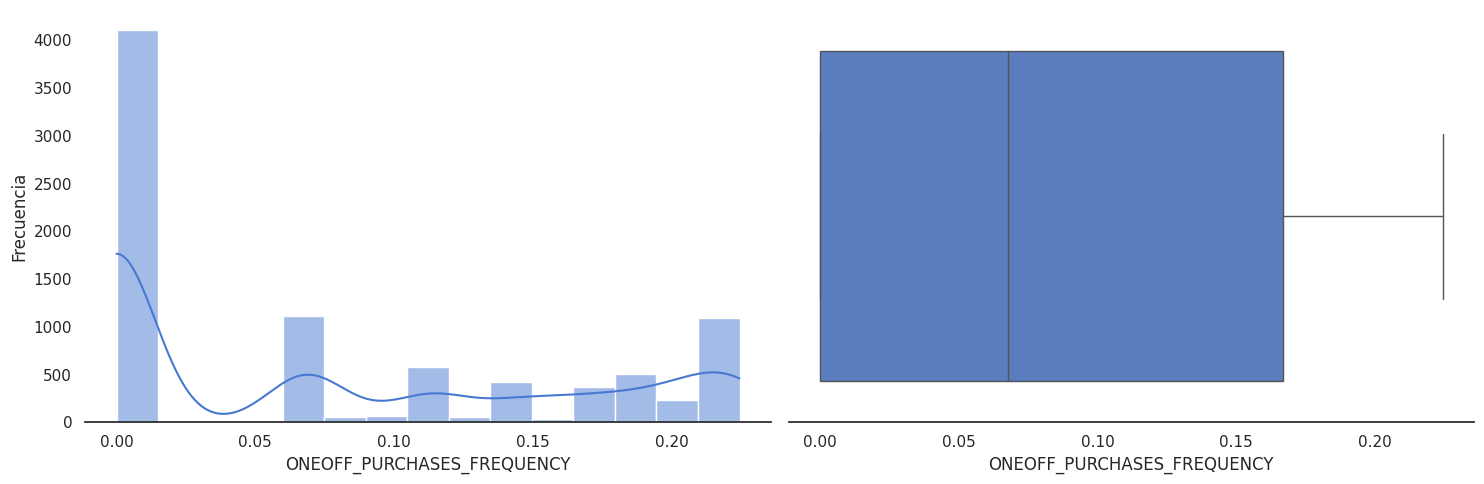

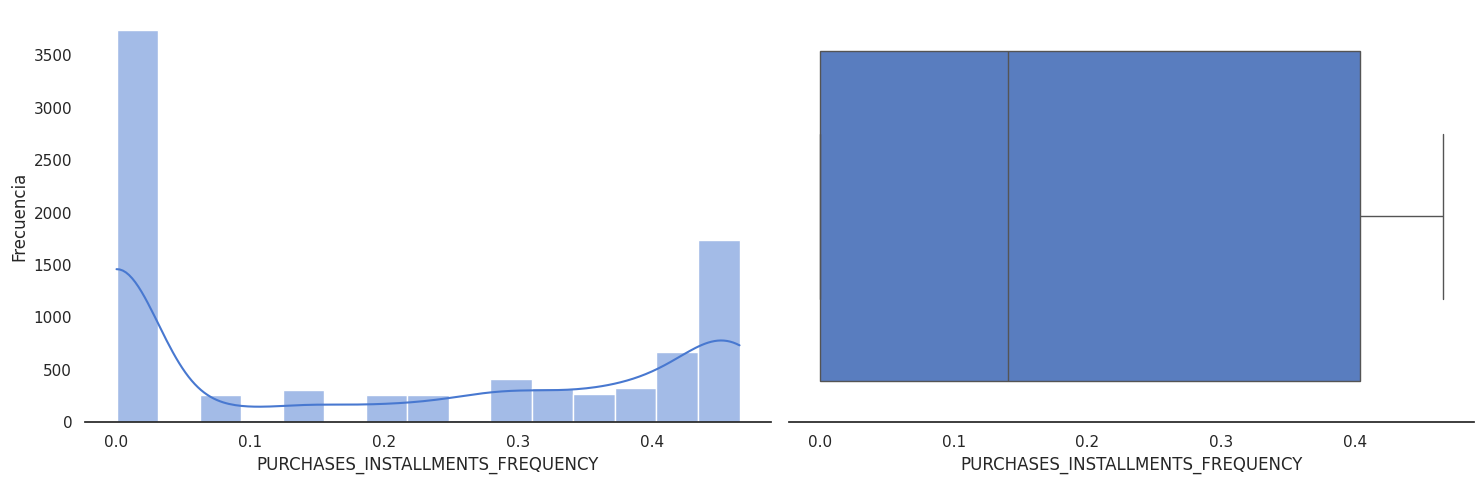

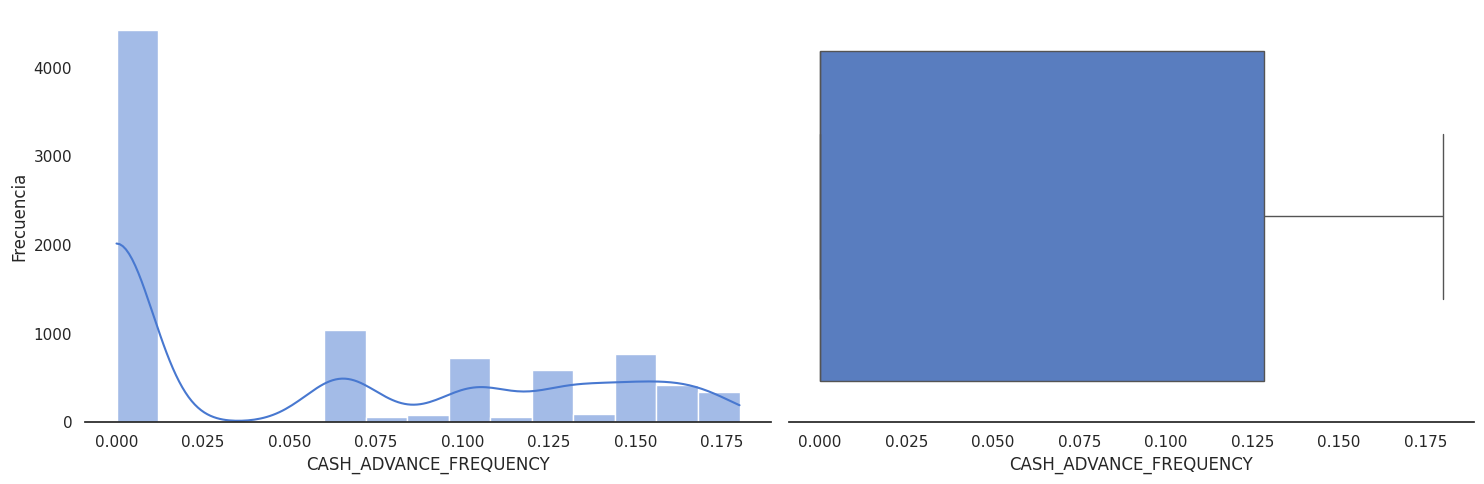

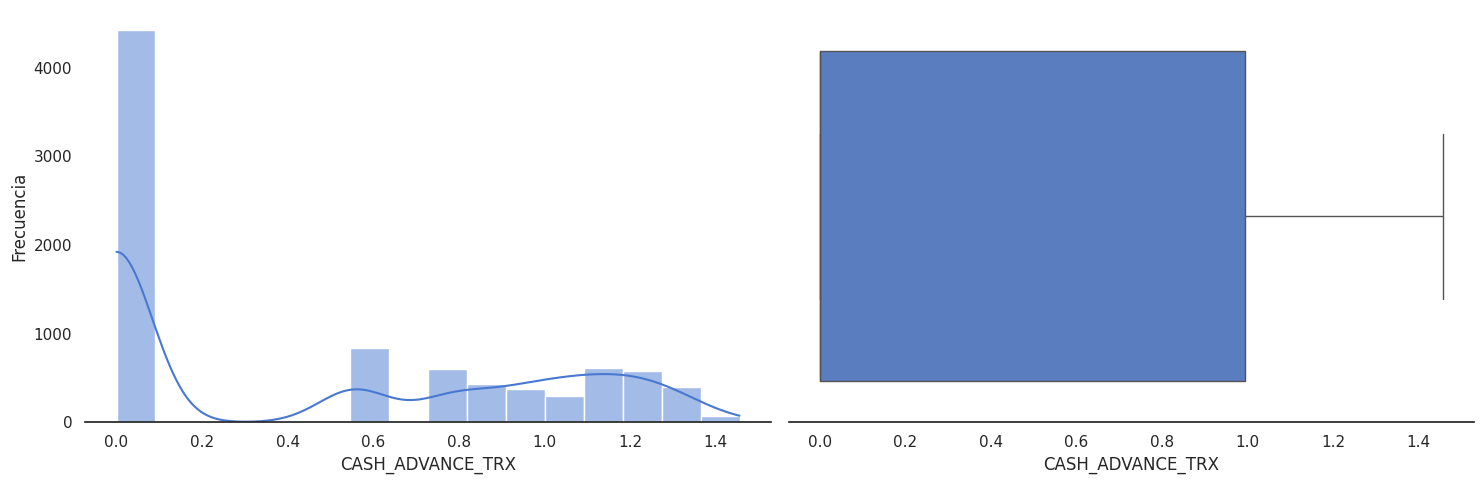

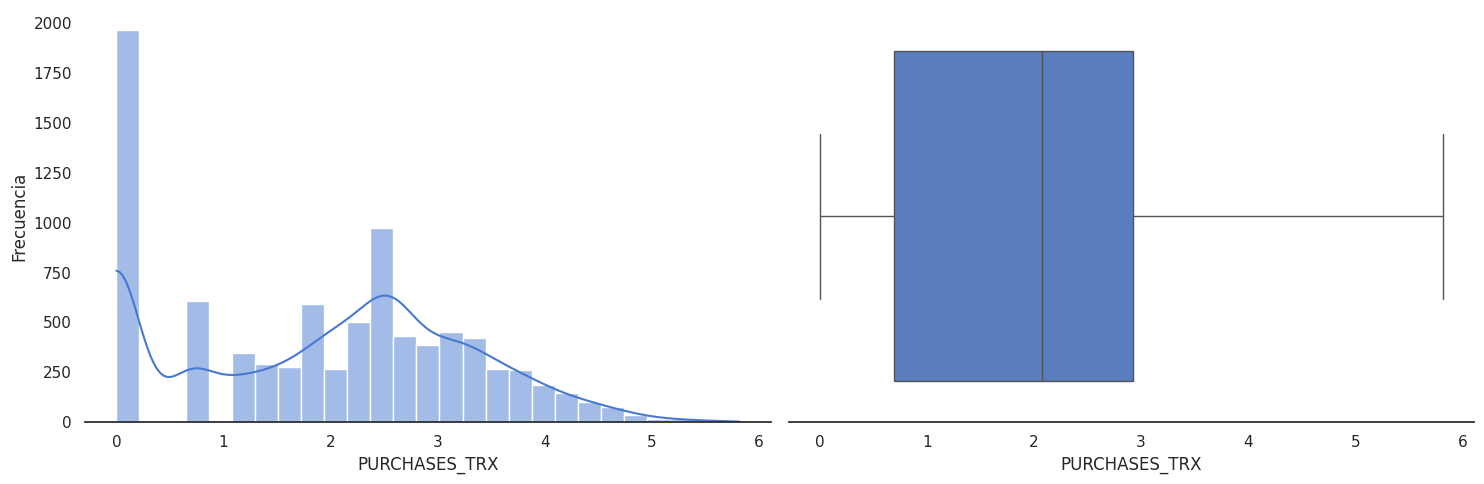

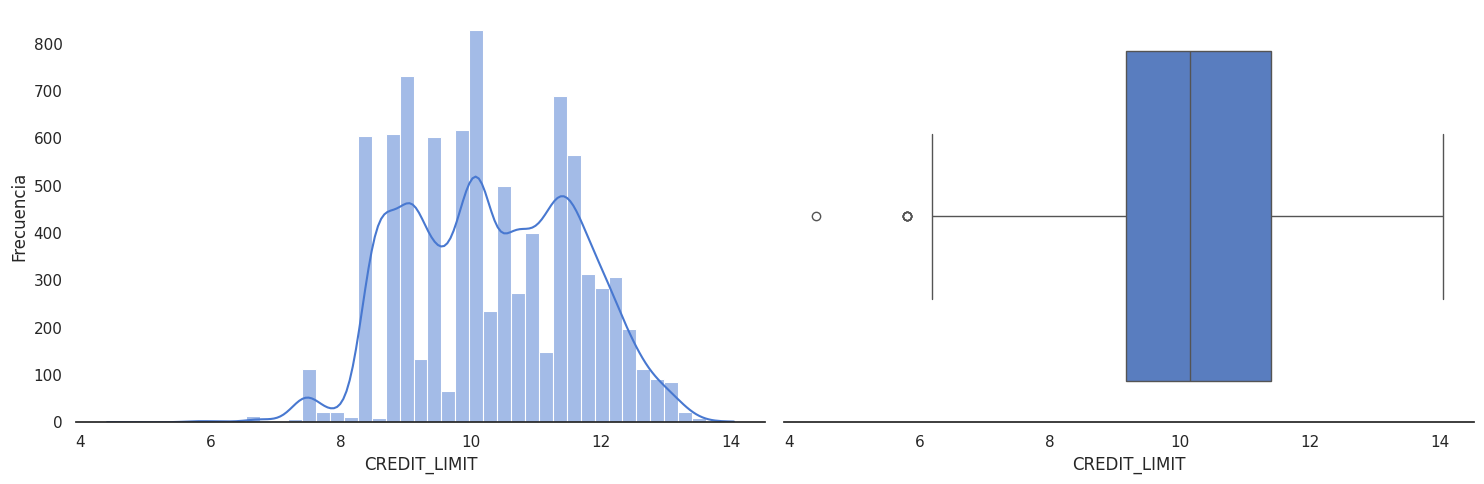

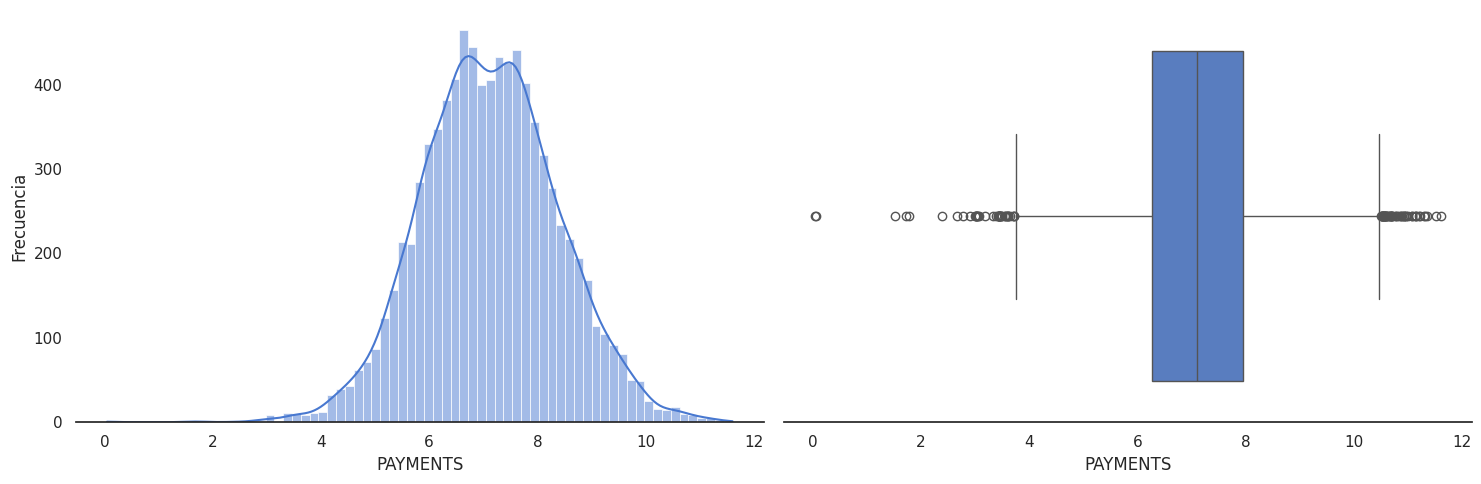

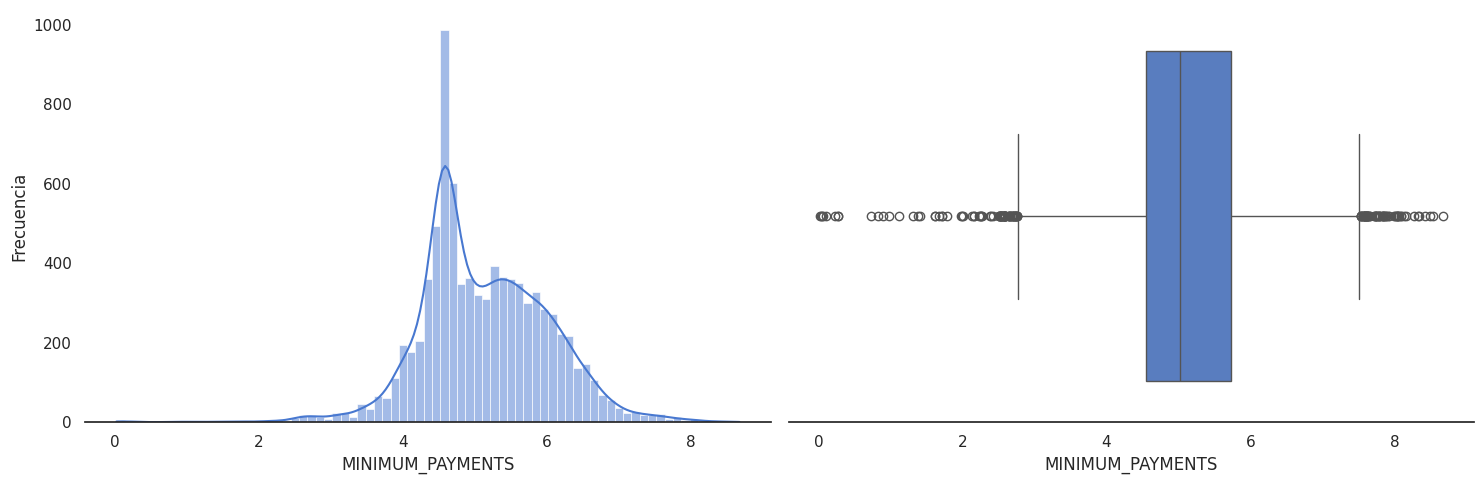

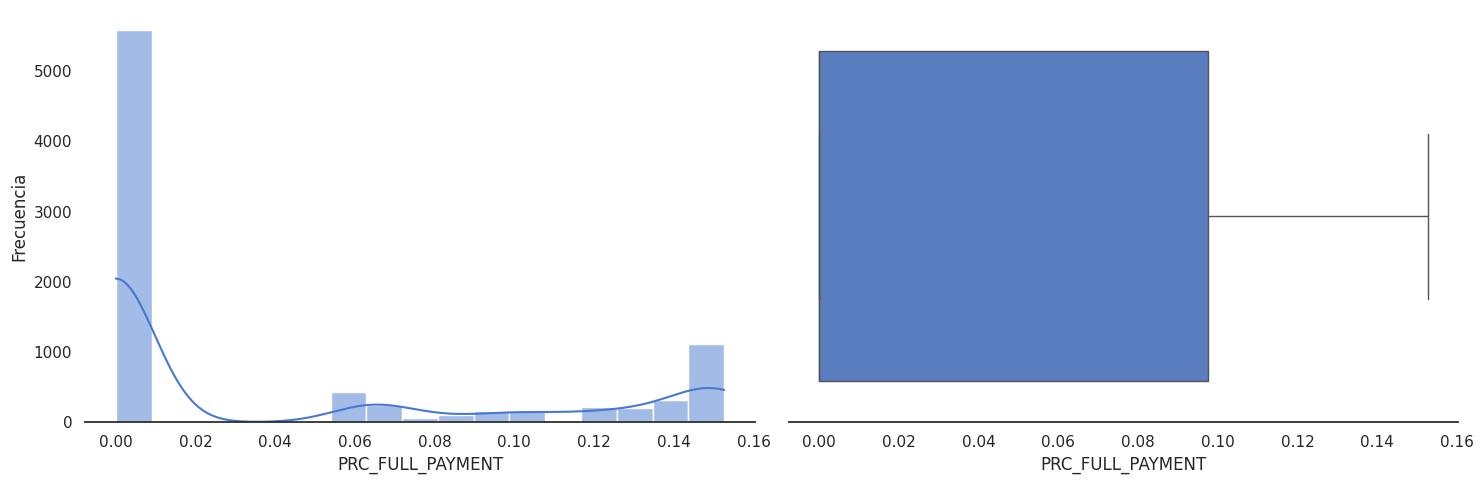

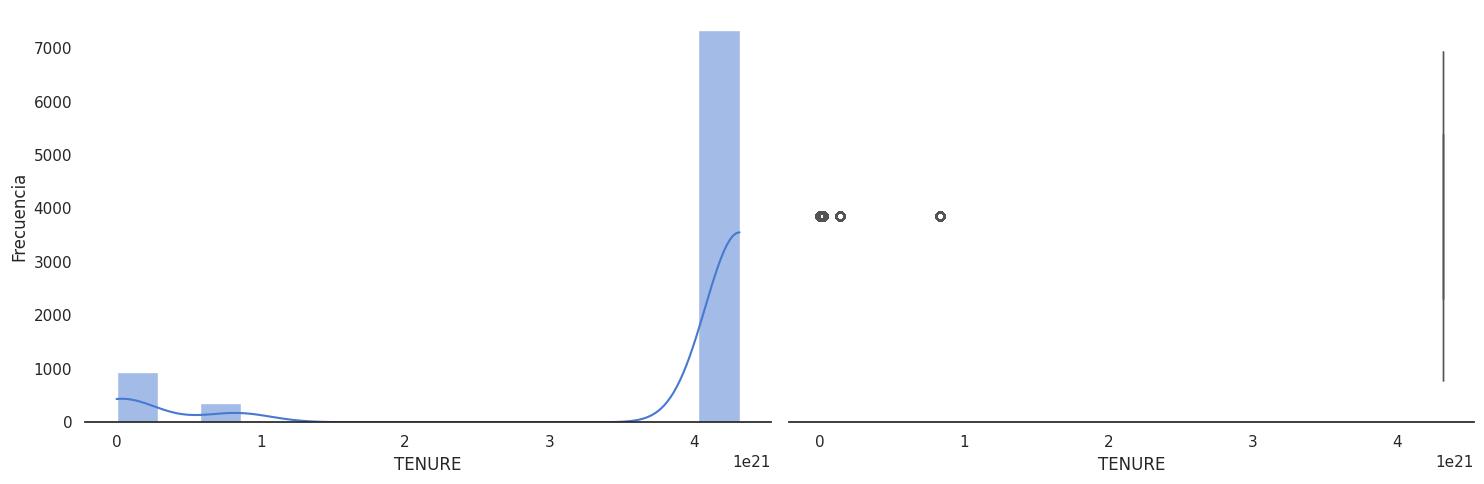

In [10]:
vis_hist_boxplot(df)

## Análisis

Si bien se realizó limpieza eliminando los datos nulos, ya que su porcentaje era menor al 5% en general del dataset, la indicación de eliminar valores atípicos no me pareció lo mejor, dado que en algunos casos esto podría reducir en un gran porcentaje el dataset, se revisaron varias transformaciones y con la que se encontró mejores resultados fue con boxcox

## Para los análisis que prosiguen
- Variables relacionadas con montos de dinero (representan el comportamiento de gasto del usuario):

BALANCE: Saldo en la cuenta.
PURCHASES: Total de compras realizadas.
ONEOFF_PURCHASES: Compras hechas en una sola transacción grande.
INSTALLMENTS_PURCHASES: Compras hechas a plazos.
CASH_ADVANCE: Adelantos en efectivo.
CREDIT_LIMIT: Límite de crédito disponible.
PAYMENTS: Total de pagos hechos.
MINIMUM_PAYMENTS: Mínimo de pagos hechos.

- Variables relacionadas con la frecuencia de uso de la tarjeta (para entender la intensidad del uso de la tarjeta):

BALANCE_FREQUENCY: Frecuencia con la que se actualiza el saldo.
PURCHASES_FREQUENCY: Frecuencia de compras.
ONEOFFPURCHASESFREQUENCY: Frecuencia de compras de una sola transacción grande.
PURCHASESINSTALLMENTSFREQUENCY: Frecuencia de compras a plazos.
CASHADVANCEFREQUENCY: Frecuencia con la que el usuario usa adelantos en efectivo.
CASHADVANCETRX: Número de transacciones de adelantos en efectivo.
PURCHASES_TRX: Número de transacciones de compras realizadas.
PRCFULLPAYMENT: Porcentaje de pagos hechos en su totalidad.

In [12]:
df.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [14]:
from sklearn.preprocessing import StandardScaler

# Seleccionar características relevantes
# Variables relacionadas con montos de dinero (representan el comportamiento de gasto del usuario):
f1 = [
    'BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
    'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS']


# Variables relacionadas con la frecuencia de uso de la tarjeta (para entender la intensidad del uso de la tarjeta):
f2 = [
    'BALANCE_FREQUENCY', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
    'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
    'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'PRC_FULL_PAYMENT'
]


# Extraer solo las columnas seleccionadas
X1 = df[f1]
X2 = df[f2]

# Aplicar escalado estándar
scaler = StandardScaler()
X_scaled1 = scaler.fit_transform(X1)
X_scaled2 = scaler.fit_transform(X2)

# Convertir a DataFrame para mejor visualización
X_scaled1_df = pd.DataFrame(X_scaled1, columns=f1)
X_scaled2_df = pd.DataFrame(X_scaled2, columns=f2)

# Verificar la estandarización
print(X_scaled1_df.describe())
print(X_scaled2_df.describe())



            BALANCE     PURCHASES  ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  \
count  8.636000e+03  8.636000e+03      8.636000e+03            8.636000e+03   
mean  -1.974644e-17  1.678447e-16      3.291073e-17            5.265717e-17   
std    1.000058e+00  1.000058e+00      1.000058e+00            1.000058e+00   
min   -2.232820e+00 -1.508970e+00     -1.008428e+00           -1.092643e+00   
25%   -8.164164e-01 -6.411541e-01     -1.008428e+00           -1.092643e+00   
50%    1.477858e-01  1.613486e-01      2.668402e-01            3.615694e-01   
75%    7.152577e-01  7.112761e-01      9.868688e-01            9.015242e-01   
max    2.747666e+00  3.565403e+00      1.973968e+00            2.228436e+00   

       CASH_ADVANCE  CREDIT_LIMIT      PAYMENTS  MINIMUM_PAYMENTS  
count  8.636000e+03  8.636000e+03  8.636000e+03      8.636000e+03  
mean   2.632859e-17  1.579715e-16 -3.686002e-16     -4.607503e-17  
std    1.000058e+00  1.000058e+00  1.000058e+00      1.000058e+00  
min   -9.512582e

## Análisis
Se revisó que análisis se podría realizar, dado que las variables sugeridas no me eran claras por que en un punto se sugieren 3 y en otro 2, y son diferentes, además las variables en inglés en algunos casos no me hacían sentido con lo solicitado en español. Así que dividí dos análisis, uno relacionado a los montos de dinero y otro relacionado a la frecuencia de uso de la tarjeta. Se realizó la selección de características y el escalado

# 3. Aplicación de K-means y DBSCAN:

  – Implementa primero el algoritmo K-means para agrupar los clientes. Determina el número óptimo de clusters utilizando el método del codo y calcula el “silhouette score” para evaluar la cohesión de los clusters formados.
  
  – Luego, aplica DBSCAN al mismo conjunto de datos. Experimenta con diferentes valores de epsilon y min_samples para obtener un clustering que capture tanto los clusters densos como los outliers.

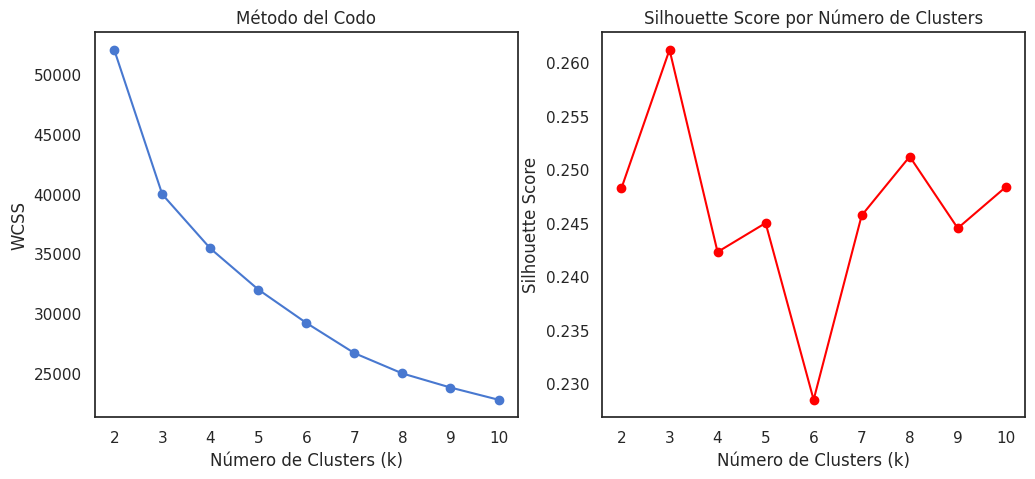

In [27]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Seleccionar el conjunto de datos escalado
X = X_scaled1  # O usa X_scaled2

# Probar diferentes valores de k
wcss = []
silhouette_scores = []

k_values = range(2, 11)  # Probar de 2 a 10 clusters
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X)
    wcss.append(kmeans.inertia_)  # Guardar inercia
    silhouette_scores.append(silhouette_score(X, labels))  # Guardar silhouette score

# Graficar el Método del Codo
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(k_values, wcss, marker='o')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('WCSS')
plt.title('Método del Codo')

# Graficar el Silhouette Score
plt.subplot(1,2,2)
plt.plot(k_values, silhouette_scores, marker='o', color='red')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score por Número de Clusters')

plt.show()


Cluster_KMeans
1    1789
3    1676
2    1627
4    1226
0    1191
5    1127
Name: count, dtype: int64


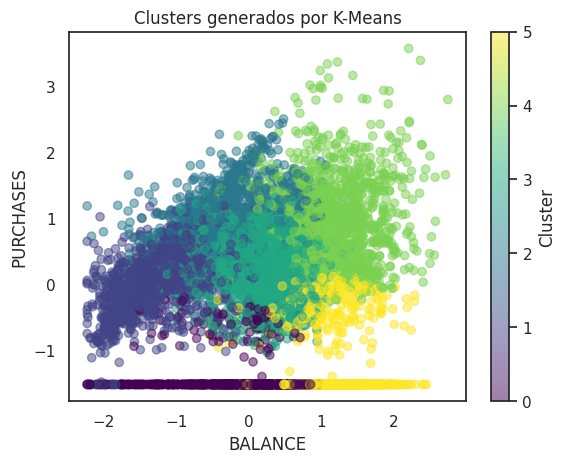

In [50]:
# Aplicar K-Means con el número óptimo de clusters (suponiendo k=3, 6 o 7)
k_optimo = 6  # Ajusta según lo que obtengas en las gráficas
kmeans = KMeans(n_clusters=k_optimo, random_state=42, n_init=10)
labels_kmeans = kmeans.fit_predict(X_scaled1)
df['Cluster_KMeans'] = kmeans.fit_predict(X)

# Ver distribución de los clusters
print(df['Cluster_KMeans'].value_counts())

# Graficar dispersión de los clusters (usando solo 2 variables para visualizar)
plt.scatter(X[:, 0], X[:, 1], c=df['Cluster_KMeans'], cmap='viridis', alpha=0.5)
plt.xlabel(f1[0])  # Nombre de la primera variable usada
plt.ylabel(f1[1])  # Nombre de la segunda variable usada
plt.title("Clusters generados por K-Means")
plt.colorbar(label="Cluster")
plt.show()


Cluster_DBSCAN
 0    8626
-1      10
Name: count, dtype: int64


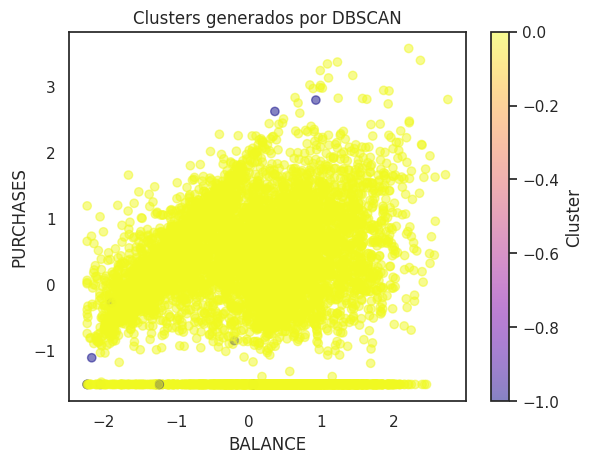

In [51]:
from sklearn.cluster import DBSCAN

# Configurar DBSCAN
eps = 1.8  # Distancia máxima entre puntos en un cluster (ajustar)
min_samples = 4  # Mínimo de puntos en un cluster

dbscan = DBSCAN(eps=eps, min_samples=min_samples)
labels_dbscan = dbscan.fit_predict(X_scaled1)
df['Cluster_DBSCAN'] = dbscan.fit_predict(X)

# Ver distribución de clusters (DBSCAN asigna -1 a los outliers)
print(df['Cluster_DBSCAN'].value_counts())

# Graficar dispersión de los clusters
plt.scatter(X[:, 0], X[:, 1], c=df['Cluster_DBSCAN'], cmap='plasma', alpha=0.5)
plt.xlabel(f1[0])
plt.ylabel(f1[1])
plt.title("Clusters generados por DBSCAN")
plt.colorbar(label="Cluster")
plt.show()


In [52]:
print("Clusters K-Means:", df['Cluster_KMeans'].nunique())
print("Clusters DBSCAN:", df['Cluster_DBSCAN'].nunique())

# Si quieres ver qué clientes están en outliers según DBSCAN:
outliers = df[df['Cluster_DBSCAN'] == -1]
print(f"Clientes detectados como outliers: {len(outliers)}")


Clusters K-Means: 6
Clusters DBSCAN: 2
Clientes detectados como outliers: 10


## Análisis

Se aplicón K-means y DBSCAN a uno de los datos escalados seleccionados y se encontró que si bien no hay claridad en el método del codo, en el gráfico de silueta si hay picos en 3, 6 y 8, así que se probó con estos, definiendo un numero óptimo de K=6. Por su parte en el DBSCAN se debieron ajustar eps y min_samples para obtener un número bajo de valores atípicos.

# 4. Comparación mediante métricas:

  – Calcula y compara las siguientes métricas de evaluación para ambos algoritmos:

    – Silhouette Score: Esta métrica mide cuán similares son los puntos dentro del mismo cluster en comparación con los puntos de otros clusters.
    
    – Calinski-Harabasz Index: Esta métrica evalúa la dispersión entre los clusters y dentro de ellos, con mayores valores indicando una mejor definición de clusters.

  – Visualiza ambos agrupamientos utilizando gráficos de dispersión para comparar visualmente cómo K-means y DBSCAN dividen los datos.


In [53]:
from sklearn.metrics import silhouette_score

silhouette_kmeans = silhouette_score(X_scaled1, labels_kmeans)
silhouette_dbscan = silhouette_score(X_scaled1, labels_dbscan)

print(f"Silhouette Score K-Means: {silhouette_kmeans}")
print(f"Silhouette Score DBSCAN: {silhouette_dbscan}")

Silhouette Score K-Means: 0.2284932414638007
Silhouette Score DBSCAN: 0.41353417183980046


In [54]:
from sklearn.metrics import calinski_harabasz_score

ch_kmeans = calinski_harabasz_score(X_scaled1, labels_kmeans)
ch_dbscan = calinski_harabasz_score(X_scaled1, labels_dbscan)

print(f"Calinski-Harabasz Index K-Means: {ch_kmeans}")
print(f"Calinski-Harabasz Index DBSCAN: {ch_dbscan}")


Calinski-Harabasz Index K-Means: 2352.828342613365
Calinski-Harabasz Index DBSCAN: 6.7074533305205915


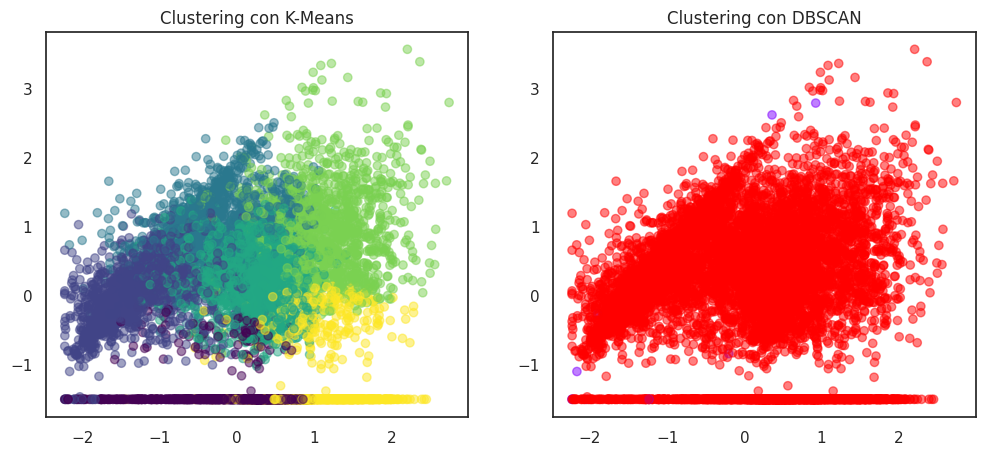

In [56]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# Gráfico K-Means
plt.subplot(1, 2, 1)
plt.scatter(X_scaled1[:, 0], X_scaled1[:, 1], c=labels_kmeans, cmap='viridis', alpha=0.5)
plt.title("Clustering con K-Means")

# Gráfico DBSCAN
plt.subplot(1, 2, 2)
plt.scatter(X_scaled1[:, 0], X_scaled1[:, 1], c=labels_dbscan, cmap='rainbow', alpha=0.5)
plt.title("Clustering con DBSCAN")

plt.show()


## Análisis

Como el Silhouette Score mide que tan bien separados están los clusters, el valor más alto en DBSCAN sugiere que aquí están agrupados los datos con mayor cohesión y mejor separación en comparación con K-means

Pero por otro lado, el Calinski-Harabasz Index más alto en K-means sugiere que los clusters aquí está más compactos que en DBSCAN

- DBSCAN detecta mejor outliers y tiene mejor Silhouette Score.

- K-Means forma clusters más compactos según Calinski-Harabasz Index.

- Si hay ruido en los datos (como es el caso), DBSCAN es mejor.

- Si se busca una estructura bien definida, K-Means es mejor.

# 5. Interpretación de resultados:

  – Discute cuál de los dos algoritmos ofrece un mejor rendimiento en este dataset basado en las métricas calculadas. ¿Los clusters formados por K-means son más cohesivos que los obtenidos con DBSCAN?

  – Analiza también los outliers detectados por DBSCAN. ¿Estos puntos tienen comportamientos inusuales en comparación con los clientes agrupados por K-means?

K-Means agrupa mejor los datos en términos de compactación y separación de clusters (Calinski-Harabasz más alto).

DBSCAN detecta mejor los outliers y logra una mejor cohesión dentro de los clusters (Silhouette Score más alto).

Si el objetivo es encontrar estructuras bien separadas, K-Means es mejor.

Si el objetivo es detectar anomalías o grupos densos, DBSCAN es mejor.

# Análisis de Resultados:

 – En esta sección, evalúa los resultados de ambos algoritmos y discute cuál de ellos es más adecuado para este tipo de datos. Considera la forma de los clusters, la presencia de outliers y las métricas de evaluación para justificar tu elección.

  – Genera un reporte que incluya gráficas comparativas y explique por qué se prefirió un algoritmo sobre el otro. Discute también las limitaciones de cada uno en este caso.

# Conclusión:

 – Esta actividad busca aplicar y comparar dos técnicas de clustering utilizando métricas estándar de evaluación. A través de esta comparación, se espera que los estudiantes entiendan las fortalezas y debilidades de K-means y DBSCAN, y cómo seleccionar el mejor modelo para diferentes tipos de datos.